# Why this code exists
This notebook takes the finished and aggregated sampled references resulting from **Crowd_Results_Analysis.ipynb**, after they have been passed through **Add_fields_to_final_annotation_sets.ipynb**, and analysis the final results. 

In [19]:
import json
import copy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [25]:
def annotate_barplot(g, pad_x, pad_y=0, middle=20, perc=False, limit_to_half=False):
    for p in g.patches:
        width = p.get_width()
        x = (width + pad_x if width < middle else width - pad_x)
        if limit_to_half:
            x = min(x, g.get_xlim()[1]/2)
        g.text(x,
            p.get_y()+p.get_height()/2. + pad_y,
            '{:1.2f}'.format(width) + '%'*perc,
            ha="center")
        
def annotate_barplot2(g, pad_x, pad_y=0, perc=False):
    for p in g.patches:
        width = p.get_width()
        g.text(pad_x ,
                p.get_y()+p.get_height()/2. + pad_y,
                '{:1.2f}'.format(width) + '%'*perc,
                ha="center")
        
def aggregate_other(df, by, count_name='count', other_thr=1):
    df_c = df.copy()
    df_c = df_c[[by,count_name]]
    total_count = df_c[count_name].sum()
    df_c['per'] = df_c[count_name].apply(lambda x: 100*x/total_count)

    other_df_c = df_c[df_c['per'] < other_thr].sum()
    other_df_c[by] = 'other'

    df_c = df_c.append(
        other_df_c, ignore_index=True
    ).sort_values('per',ascending=False).reset_index(drop=True)
    df_c = df_c[df_c['per'] >= other_thr]

    return df_c

In [20]:
with open('./data/final/all_aggregated_annotations/sampled_references_annotated_en_all.json') as f:
    all_en = json.load(f)
with open('./data/final/all_aggregated_annotations/sampled_references_annotated_es_all.json') as f:
    all_es = json.load(f)
with open('./data/final/all_aggregated_annotations/sampled_references_annotated_pt_all.json') as f:
    all_pt = json.load(f)

In [21]:
all_annotations = all_en + all_es + all_pt

In [22]:
annotations_df = copy.deepcopy(all_annotations)
for a in annotations_df:
    a['is_present'] = a['g_id']['relevance']['is_present']
    a['difficulty'] = a['g_id']['relevance']['difficulty']
    a['reason'] = a['g_id']['relevance']['reason']
    a['author'] = a['g_id']['authorit']['author']
    a['publisher'] = a['g_id']['authorit']['publisher']
    a['sub_publisher'] = a['g_id']['authorit']['sub_publisher']
    a.pop('g_id')
    a.pop('ref_node_pairs')
annotations_df = pd.DataFrame(annotations_df)
annotations_df

,reference_id,url,language_crawl,statement_node,subject,predicate,object,url_type,is_inferred_from,stated_in,...,external_url,wikimedia_import_urls,retrieved,publication_date,is_present,difficulty,reason,author,publisher,sub_publisher
0,a4e7281c6909b7cb2dc251f84627a41204abe07e,https://viaf.org/viaf/64195194,en,Q7172351-D3F236F2-D920-4CF4-965E-0F33F68142A0,Pete Wylie,DNB ID,134561961,internal_url,None,Q54919,...,None,[],"{'time': '+2017-10-16T00:00:00Z', 'timezone': ...",None,1,3,-1,1,1,2
1,eec01187c078f8e4994ae4edd38a7e8c1a300233,https://www.ebi.ac.uk/europepmc/webservices/re...,en,Q44753358-59ACE205-1F9D-44F9-A74B-BF6FD0979EA2,An assessment of heavy metal bioaccumulation i...,PubMed ID,23666324,external_url,None,Q5412157,...,https://www.ebi.ac.uk/europepmc/webservices/re...,[],"{'time': '+2020-03-01T00:00:00Z', 'timezone': ...",None,1,3,-1,3,5,-1
2,5fcb9535013745aa366695b0ad4447f5cd7d3224,https://www.ebi.ac.uk/europepmc/webservices/re...,en,Q84622415-AE4E1E00-DD0C-413F-9356-DEE4A4045E35,Bottom-up optimization of SERS hot-spots,page(s),9346-9348,external_url,None,Q5412157,...,https://www.ebi.ac.uk/europepmc/webservices/re...,[],"{'time': '+2020-02-09T00:00:00Z', 'timezone': ...",None,1,3,-1,1,0,0
3,a10885a0cc7258364dd9f3b7cc39491d3793aa4d,https://www.ebi.ac.uk/europepmc/webservices/re...,en,Q82111771-70D99A66-3CE8-435C-BA6E-6615C847C4CA,Safety and efficacy of inhaled human insulin (...,PubMed ID,18824271,external_url,None,Q5412157,...,https://www.ebi.ac.uk/europepmc/webservices/re...,[],"{'time': '+2020-01-14T00:00:00Z', 'timezone': ...",None,1,3,-1,1,0,0
4,6831ccb51015d8641bff0db303fd8e21dc342c67,https://api.crossref.org/works/10.1111%2FPALA....,en,Q48109821-D3B78AF9-6CEF-4F46-BC57-E879A6FC51BA,Probabilistic methods surpass parsimony when a...,cites work,"TNT, a free program for phylogenetic analysis",external_url,None,Q5188229,...,https://api.crossref.org/works/10.1111%2FPALA....,[],"{'time': '+2018-01-21T00:00:00Z', 'timezone': ...",None,1,1,-1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,a760112ad9795fb33189513965256794df2f633c,https://viaf.org/viaf/122539945,pt,Q9830994-A3D18325-D2CA-47AB-9066-40A86D56FFCC,Companhia da Zambézia,identificador WorldCat Identities,viaf-122539945,internal_url,None,None,...,None,[],None,None,1,2,-1,1,1,3
1151,d2f4efa2190ced899dcc75f7b608cf0023122570,https://viaf.org/viaf/91373350,pt,Q1791039-A547F366-3ABD-47A3-B37A-451E2CE03320,Francisco Iglésias,identificador NTA PPN,072265205,internal_url,None,Q54919,...,None,[],"{'time': '+2018-08-27T00:00:00Z', 'timezone': ...",None,1,2,-1,1,1,3
1152,eb1485146eef90f60723dbc57fee15926b303759,https://api.crossref.org/works/10.1590%2FS0102...,pt,Q51144947-A631FC47-EC8D-4B0B-8BC8-AB26F8418DFB,Increase in spleen volume of rats on experimen...,cita,Experimental portal hypertension in the rat.,external_url,None,Q5188229,...,https://api.crossref.org/works/10.1590%2FS0102...,[],"{'time': '+2018-01-21T00:00:00Z', 'timezone': ...",None,1,1,-1,1,0,2
1153,7e73f61f63a799da4ad1da4f4ffd4c7fcb8404e8,https://www.ebi.ac.uk/europepmc/webservices/re...,pt,Q33848447-C285A200-BA51-4F22-AAF6-4F4C76153B02,Cytotoxic effects of the compound cis-tetraamm...,título,Cytotoxic effects of the compound cis-tetraamm...,external_url,None,Q5412157,...,https://www.ebi.ac.uk/europepmc/webservices/re...,[],"{'time': '+2020-03-09T00:00:00Z', 'timezone': ...",None,1,3,-1,1,0,0


# Analysing resulting datasets: general

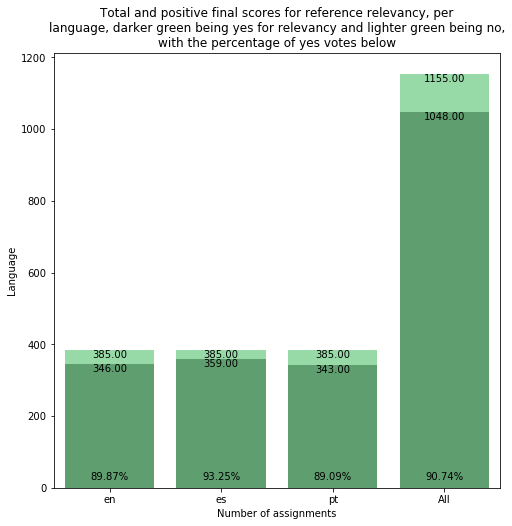

In [23]:
fig, ax = plt.subplots(figsize=(8,8))

annotations_df_is_present_lan = annotations_df[['language_crawl','is_present']]\
            .groupby(['language_crawl'])\
            .sum()\
            .join(annotations_df['language_crawl'].value_counts())

annotations_df_is_present_lan.columns = ['is_present','total']
annotations_df_is_present_lan['per'] =\
    annotations_df_is_present_lan.apply(lambda x: 100*x['is_present']/x['total'], axis=1)
annotations_df_is_present_lan = annotations_df_is_present_lan.reset_index()

annotations_df_is_present_lan = annotations_df_is_present_lan.append(
    {
        'language_crawl':'All',
        'is_present': annotations_df_is_present_lan['is_present'].sum(),
        'total': annotations_df_is_present_lan['total'].sum(),
        'per': 100*annotations_df_is_present_lan['is_present'].sum()/annotations_df_is_present_lan['total'].sum()
    }, ignore_index=True
)

sns.set_color_codes("pastel")
g = sns.barplot(x="language_crawl", y="total",
            data=annotations_df_is_present_lan,
            color="g", ax=ax)

sns.set_color_codes("deep")
g = sns.barplot(x="language_crawl", y="is_present",
            data=annotations_df_is_present_lan,
            color="g", ax=ax)

for i, p in enumerate(g.patches):
    height = p.get_height()
    width = p.get_width()
    g.text(i%4,
            height-22,
            '{:1.2f}'.format(height),
            ha="center")
for i in range(4):
    g.text(i,
            22,
            '{:1.2f}%'.format(annotations_df_is_present_lan.loc[i,'per']),
            ha="center")

ax.set(title='Total and positive final scores for reference relevancy, per\nlanguage, darker green being yes for relevancy and lighter green being no,\nwith the percentage of yes votes below',
       ylabel='Language', xlabel = 'Number of assignments')

plt.show()

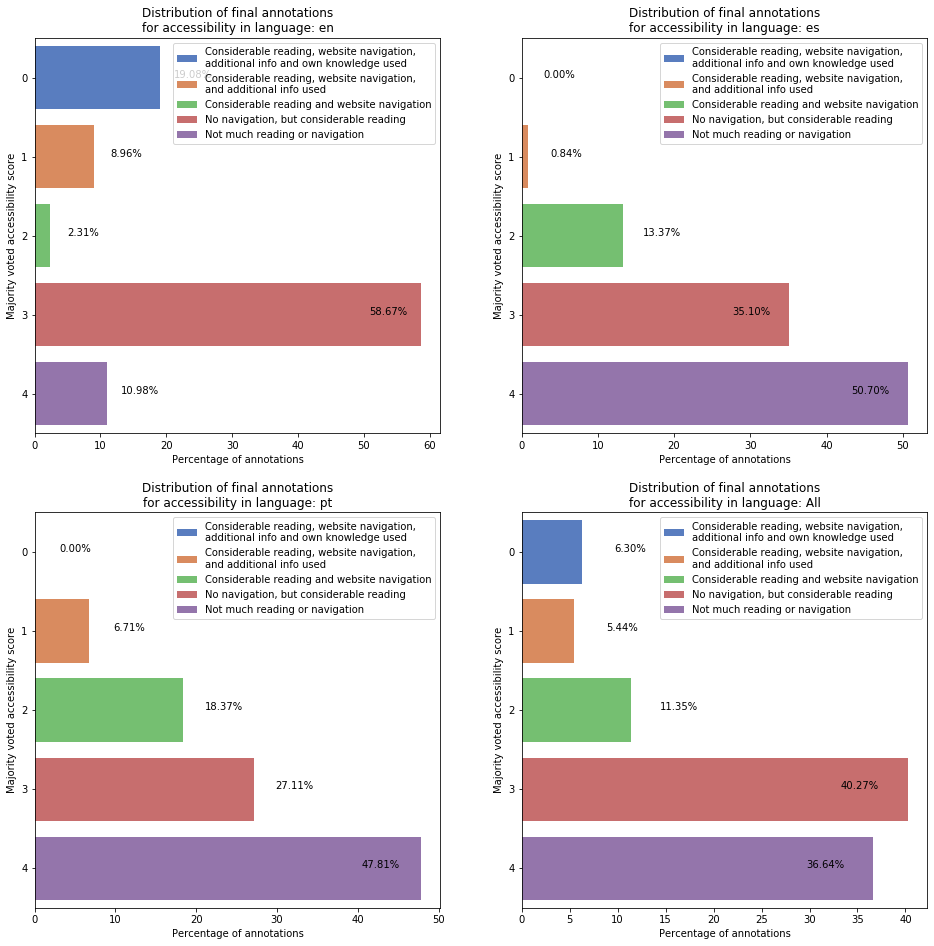

In [26]:
sns.set_palette("muted")

fig, ax = plt.subplots(2,2,figsize=(16,16))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df[annotations_df['is_present'] == 1].copy()
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
    
    annotations_df_lan =\
        annotations_df_lan['difficulty'].value_counts().reset_index()
    annotations_df_lan['per'] =\
        100*annotations_df_lan['difficulty']/sum(annotations_df_lan['difficulty'])
    
    for j in range(5):
        if j not in annotations_df_lan['index'].values:
            annotations_df_lan = annotations_df_lan.append(
                {'index':j,'difficulty':0,'per':0}, ignore_index=True
            )
    
    g = sns.barplot(
        data = annotations_df_lan,
        y = 'index',
        x = 'per', ax = ax[i//2,i%2], orient='h'
    )
    
    annotate_barplot(g, pad_x = 5, middle = 30, perc=True)
    ax[i//2,i%2].set(
        title='Distribution of final annotations\nfor accessibility in language: {}'.format(language),
        xlabel = 'Percentage of annotations',
        ylabel = 'Majority voted accessibility score'
    )
    ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
        'Considerable reading, website navigation,\nadditional info and own knowledge used',
        'Considerable reading, website navigation,\nand additional info used',
        'Considerable reading and website navigation',
        'No navigation, but considerable reading',
        'Not much reading or navigation'
    ])

plt.show()

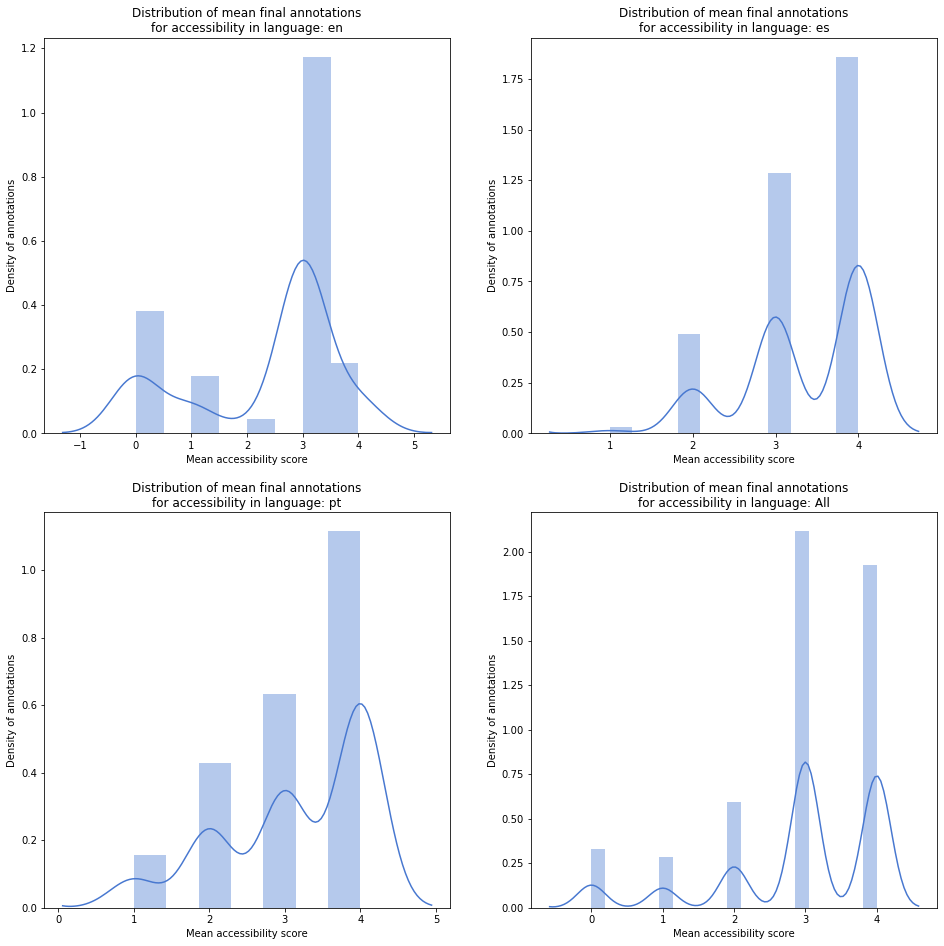

In [27]:
sns.set_palette("muted")

fig, ax = plt.subplots(2,2,figsize=(16,16))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df[annotations_df['is_present'] == 1].copy()
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
    
    g = sns.distplot(
        annotations_df_lan['difficulty'],
        ax = ax[i//2,i%2]
    )
    
   
    ax[i//2,i%2].set(
        title='Distribution of mean final annotations\nfor accessibility in language: {}'.format(language),
        ylabel = 'Density of annotations',
        xlabel = 'Mean accessibility score'
    )

plt.show()

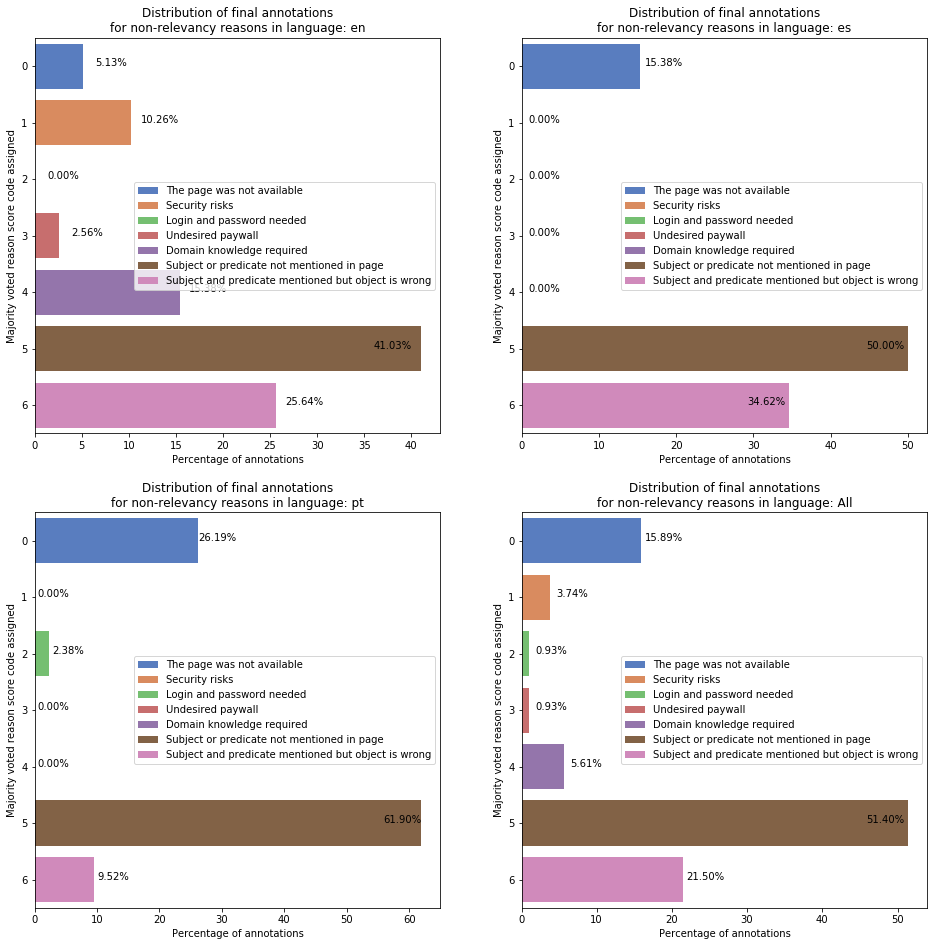

In [28]:
sns.set_palette("muted")

fig, ax = plt.subplots(2,2,figsize=(16,16))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df[annotations_df['is_present'] == 0].copy()
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
        
    annotations_df_lan =\
        annotations_df_lan['reason'].value_counts().reset_index()
    annotations_df_lan['per'] =\
        100*annotations_df_lan['reason']/sum(annotations_df_lan['reason'])
 
    for j in range(7):
        if j not in annotations_df_lan['index'].values:
            annotations_df_lan = annotations_df_lan.append(
                {'index':j,'reason':0,'per':0}, ignore_index=True
            )

    g = sns.barplot(
        data = annotations_df_lan,
        y = 'index',
        x = 'per', ax = ax[i//2,i%2], orient='h'
    )
    
    annotate_barplot(g, pad_x = 3, middle = 30, perc=True)    
    ax[i//2,i%2].set(
        title='Distribution of final annotations\nfor non-relevancy reasons in language: {}'.format(language),
        xlabel = 'Percentage of annotations',
        ylabel = 'Majority voted reason score code assigned'
    )
    
    ax[i//2,i%2].legend(
        handles=ax[i//2,i%2].patches,
        labels=[
            'The page was not available',
            'Security risks',
            'Login and password needed',
            'Undesired paywall',
            'Domain knowledge required',
            'Subject or predicate not mentioned in page',
            'Subject and predicate mentioned but object is wrong'
        ],
        loc = 'best' if i != 0 else 'center right'
    )

plt.show()

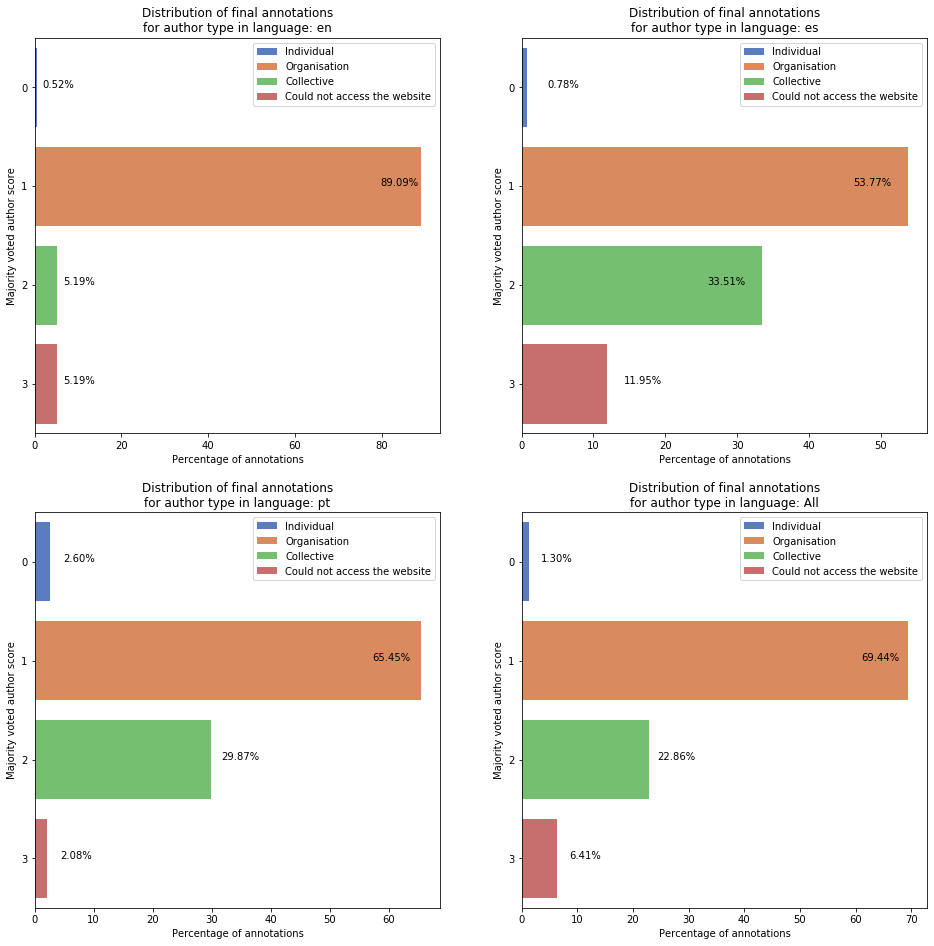

In [29]:
sns.set_palette("muted")

fig, ax = plt.subplots(2,2,figsize=(16,16))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df.copy()
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
    
    annotations_df_lan =\
        annotations_df_lan['author'].value_counts().reset_index()
    annotations_df_lan['per'] =\
        100*annotations_df_lan['author']/sum(annotations_df_lan['author'])
    
    for j in range(4):
        if j not in annotations_df_lan['index'].values:
            annotations_df_lan = annotations_df_lan.append(
                {'index':j,'author':0,'per':0}, ignore_index=True
            )
    
    g = sns.barplot(
        data = annotations_df_lan,
        y = 'index',
        x = 'per', ax = ax[i//2,i%2], orient='h'
    )
    
    annotate_barplot(g, pad_x = 5, middle = 30, perc=True)
    ax[i//2,i%2].set(
        title='Distribution of final annotations\nfor author type in language: {}'.format(language),
        xlabel = 'Percentage of annotations',
        ylabel = 'Majority voted author score'
    )
    ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
        'Individual',
        'Organisation',
        'Collective',
        'Could not access the website'
    ])

plt.show()

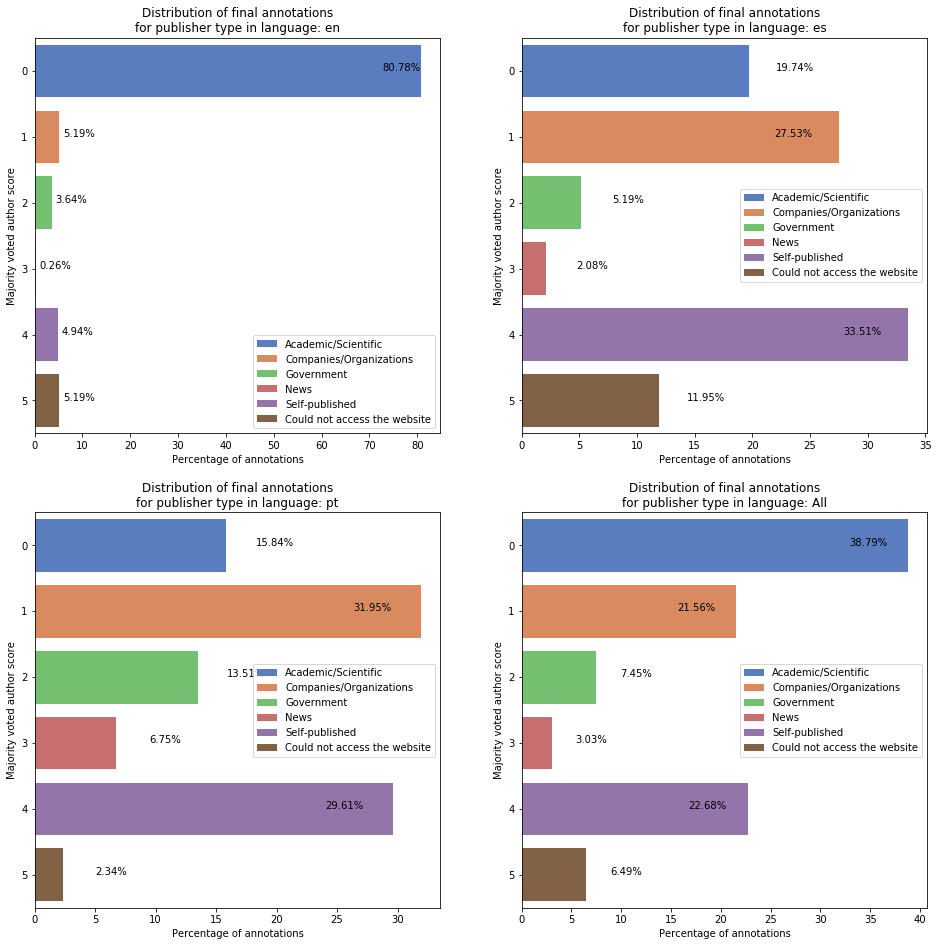

In [30]:
sns.set_palette("muted")

fig, ax = plt.subplots(2,2,figsize=(16,16))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df.copy()
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
    
    annotations_df_lan =\
        annotations_df_lan['publisher'].value_counts().reset_index()
    annotations_df_lan['per'] =\
        100*annotations_df_lan['publisher']/sum(annotations_df_lan['publisher'])
    
    for j in range(5):
        if j not in annotations_df_lan['index'].values:
            annotations_df_lan = annotations_df_lan.append(
                {'index':j,'publisher':0,'per':0}, ignore_index=True
            )
    
    g = sns.barplot(
        data = annotations_df_lan,
        y = 'index',
        x = 'per', ax = ax[i//2,i%2], orient='h'
    )
    
    annotate_barplot(g, pad_x = 4, middle = 20, perc=True)
    ax[i//2,i%2].set(
        title='Distribution of final annotations\nfor publisher type in language: {}'.format(language),
        xlabel = 'Percentage of annotations',
        ylabel = 'Majority voted author score'
    )
    ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
        'Academic/Scientific',
        'Companies/Organizations',
        'Government',
        'News',
        'Self-published',
        'Could not access the website',
    ])

plt.show()

In [32]:
def get_long_sub_publisher(row):
    if row['publisher'] not in [0,1,3]:
        return float(row['publisher'])
    else:
        return float(str(row['publisher']) + '.' + str(row['sub_publisher']))

annotations_df['long_sub_publisher'] = annotations_df.apply(get_long_sub_publisher, axis=1)

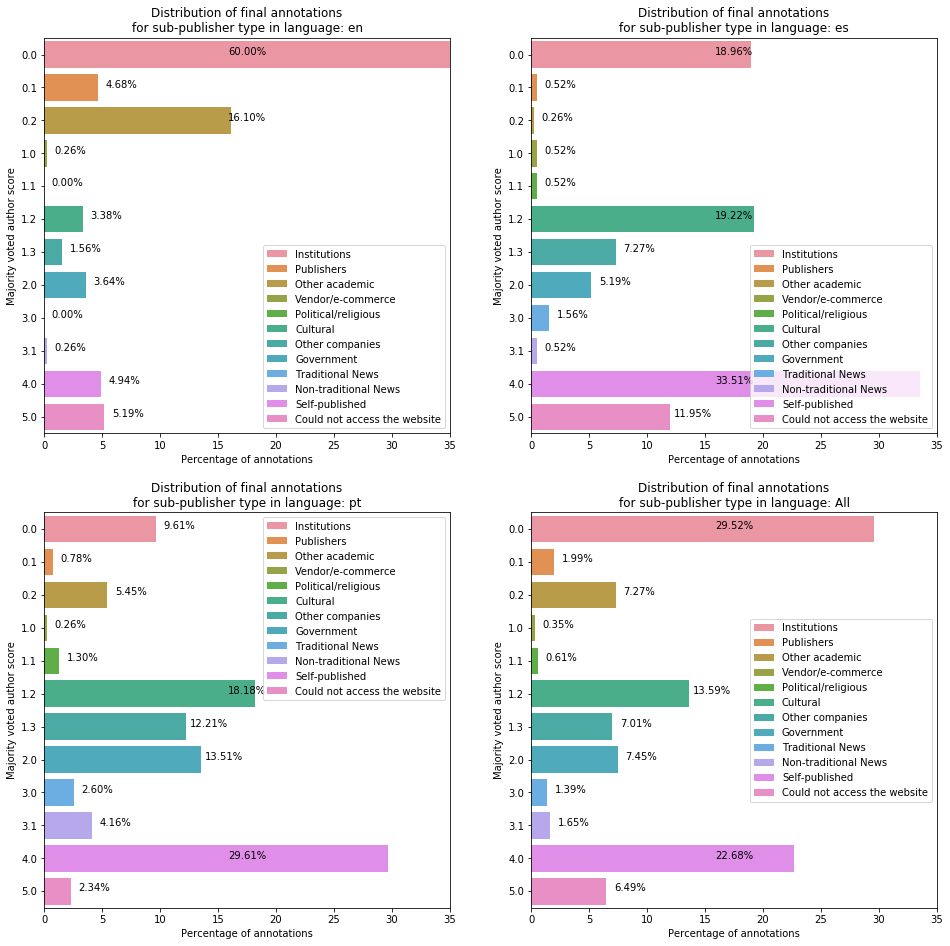

In [33]:
sns.set_palette("muted")

fig, ax = plt.subplots(2,2,figsize=(16,16))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df.copy()
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
    
    annotations_df_lan =\
        annotations_df_lan['long_sub_publisher'].value_counts().reset_index()
    annotations_df_lan['per'] =\
        100*annotations_df_lan['long_sub_publisher']/sum(annotations_df_lan['long_sub_publisher'])
    
    for j in [0.0,0.1,0.2,1.0,1.1,1.2,1.3,2.0,3.0,3.1,4.0,5.0]:
        if j not in annotations_df_lan['index'].values:
            annotations_df_lan = annotations_df_lan.append(
                {'index':j,'long_sub_publisher':0,'per':0}, ignore_index=True
            )
    
    g = sns.barplot(
        data = annotations_df_lan,
        y = 'index',
        x = 'per', ax = ax[i//2,i%2], orient='h'
    )
    
    ax[i//2,i%2].set_xlim([0,35])
    annotate_barplot(g, pad_x = 2, middle = 20, perc=True, limit_to_half=True)
    ax[i//2,i%2].set(
        title='Distribution of final annotations\nfor sub-publisher type in language: {}'.format(language),
        xlabel = 'Percentage of annotations',
        ylabel = 'Majority voted author score'
    )

    ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
        'Institutions',
        'Publishers',
        'Other academic',
        'Vendor/e-commerce',
        'Political/religious',
        'Cultural',
        'Other companies',
        'Government',
        'Traditional News',
        'Non-traditional News',
        'Self-published',
        'Could not access the website',
    ])

plt.show()

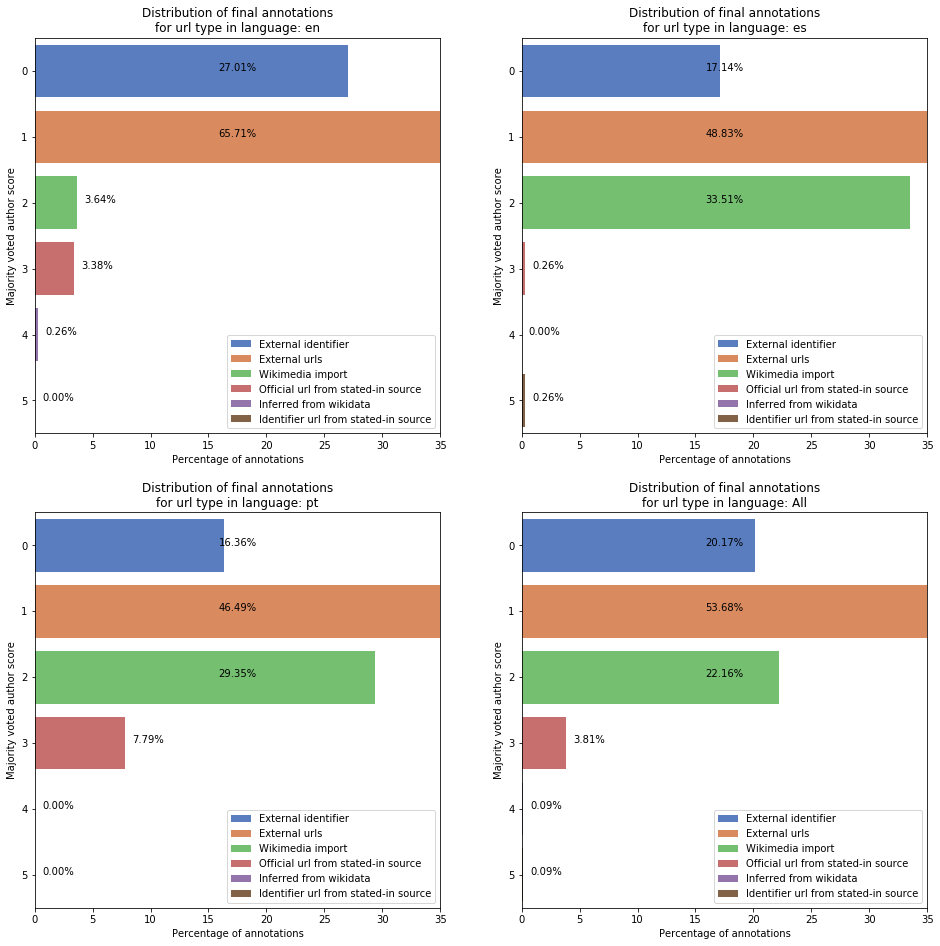

In [34]:
def numcode_url_type(x):
    if x == 'internal_url':
        return 0
    elif x == 'external_url':
        return 1
    elif x == 'wikimedia_import_url':
        return 2
    elif x == 'stated_in_official_url':
        return 3
    elif x == 'inferred_from_wikidata':
        return 4
    elif x == 'stated_in_identifier_url':
        return 5

sns.set_palette("muted")

fig, ax = plt.subplots(2,2,figsize=(16,16))

for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
    annotations_df_lan = annotations_df.copy()
    annotations_df_lan['url_type_numcoded'] = annotations_df_lan['url_type'].apply(numcode_url_type)
    if language != 'All':
        annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]
    
    annotations_df_lan =\
        annotations_df_lan['url_type_numcoded'].value_counts().reset_index()
    annotations_df_lan['per'] =\
        100*annotations_df_lan['url_type_numcoded']/sum(annotations_df_lan['url_type_numcoded'])
    
    for j in range(6):
        if j not in annotations_df_lan['index'].values:
            annotations_df_lan = annotations_df_lan.append(
                {'index':j,'url_type_numcoded':0,'per':0}, ignore_index=True
            )

    g = sns.barplot(
        data = annotations_df_lan,
        y = 'index',
        x = 'per', ax = ax[i//2,i%2], orient='h'
    )
    
    ax[i//2,i%2].set_xlim([0,35])
    annotate_barplot(g, pad_x = 2, middle = 20, perc=True, limit_to_half=True)
    ax[i//2,i%2].set(
        title='Distribution of final annotations\nfor url type in language: {}'.format(language),
        xlabel = 'Percentage of annotations',
        ylabel = 'Majority voted author score'
    )

    ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
        'External identifier',
        'External urls',
        'Wikimedia import',
        'Official url from stated-in source',
        'Inferred from wikidata',
        'Identifier url from stated-in source'
    ], loc='lower right')

plt.show()

In [35]:
annotations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   reference_id           1155 non-null   object 
 1   url                    1155 non-null   object 
 2   language_crawl         1155 non-null   object 
 3   statement_node         1155 non-null   object 
 4   subject                1155 non-null   object 
 5   predicate              1155 non-null   object 
 6   object                 1155 non-null   object 
 7   url_type               1155 non-null   object 
 8   is_inferred_from       1155 non-null   object 
 9   stated_in              1155 non-null   object 
 10  external_id_prop       1155 non-null   object 
 11  external_id            1155 non-null   object 
 12  internal_urls          1155 non-null   object 
 13  external_url           1155 non-null   object 
 14  wikimedia_import_urls  1155 non-null   object 
 15  retr

# Per URL type

In [68]:
url_types = {
    'internal_url': 'external identifier URL',
    'external_url': 'direct external URL',
    'wikimedia_import_url': 'wikimedia imported URL',
    'stated_in_official_url': 'official stated-in URL'
}

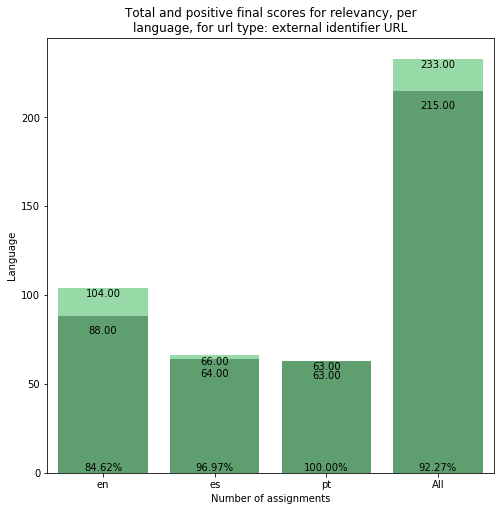

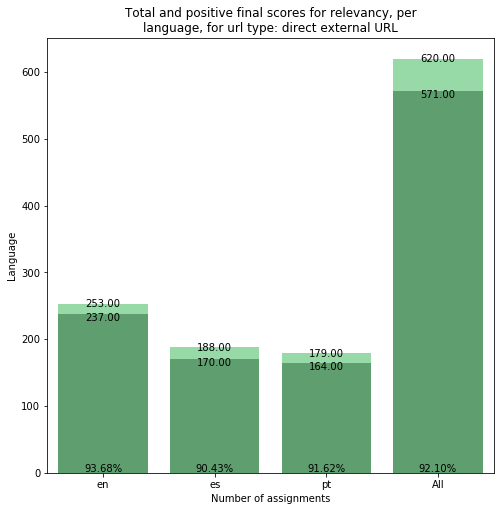

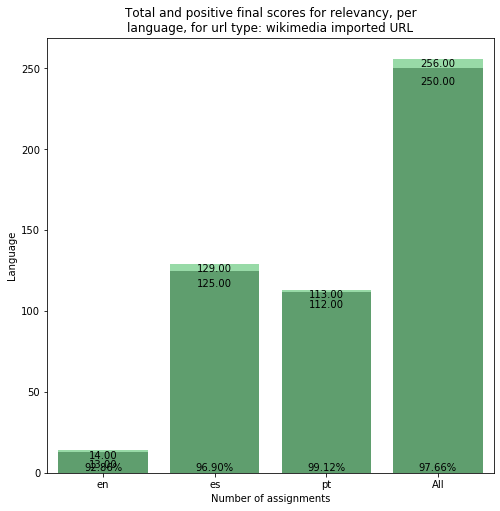

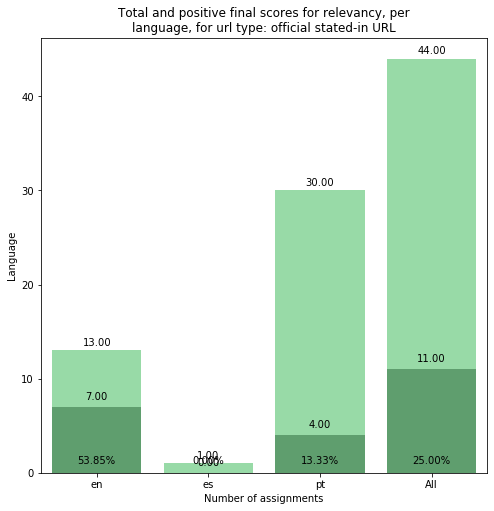

In [77]:
for url_type in url_types:

    fig, ax = plt.subplots(figsize=(8,8))

    annotations_df_url_type = annotations_df[annotations_df['url_type'] == url_type]
    annotations_df_is_present_lan = annotations_df_url_type[['language_crawl','is_present']]\
                .groupby(['language_crawl'])\
                .sum()\
                .join(annotations_df_url_type['language_crawl'].value_counts())

    annotations_df_is_present_lan.columns = ['is_present','total']
    annotations_df_is_present_lan['per'] =\
        annotations_df_is_present_lan.apply(lambda x: 100*x['is_present']/x['total'], axis=1)
    annotations_df_is_present_lan = annotations_df_is_present_lan.reset_index()

    annotations_df_is_present_lan = annotations_df_is_present_lan.append(
        {
            'language_crawl':'All',
            'is_present': annotations_df_is_present_lan['is_present'].sum(),
            'total': annotations_df_is_present_lan['total'].sum(),
            'per': 100*annotations_df_is_present_lan['is_present'].sum()/annotations_df_is_present_lan['total'].sum()
        }, ignore_index=True
    )

    sns.set_color_codes("pastel")
    g = sns.barplot(x="language_crawl", y="total",
                data=annotations_df_is_present_lan,
                color="g", ax=ax)

    sns.set_color_codes("deep")
    g = sns.barplot(x="language_crawl", y="is_present",
                data=annotations_df_is_present_lan,
                color="g", ax=ax)

    for i, p in enumerate(g.patches):
        height = p.get_height()
        width = p.get_width()
        g.text(i%4,
                (height+0.5*(1+(i//4)/2)) if url_type == 'stated_in_official_url' else (height-5*(1+i//4)),
                '{:1.2f}'.format(height),
                ha="center")
    for i in range(4):
        g.text(i,
                1,
                '{:1.2f}%'.format(annotations_df_is_present_lan.loc[i,'per']),
                ha="center")

    ax.set(title='Total and positive final scores for relevancy, per\nlanguage, for url type: {}'.format(url_types[url_type]),
           ylabel='Language', xlabel = 'Number of assignments')

    plt.show()

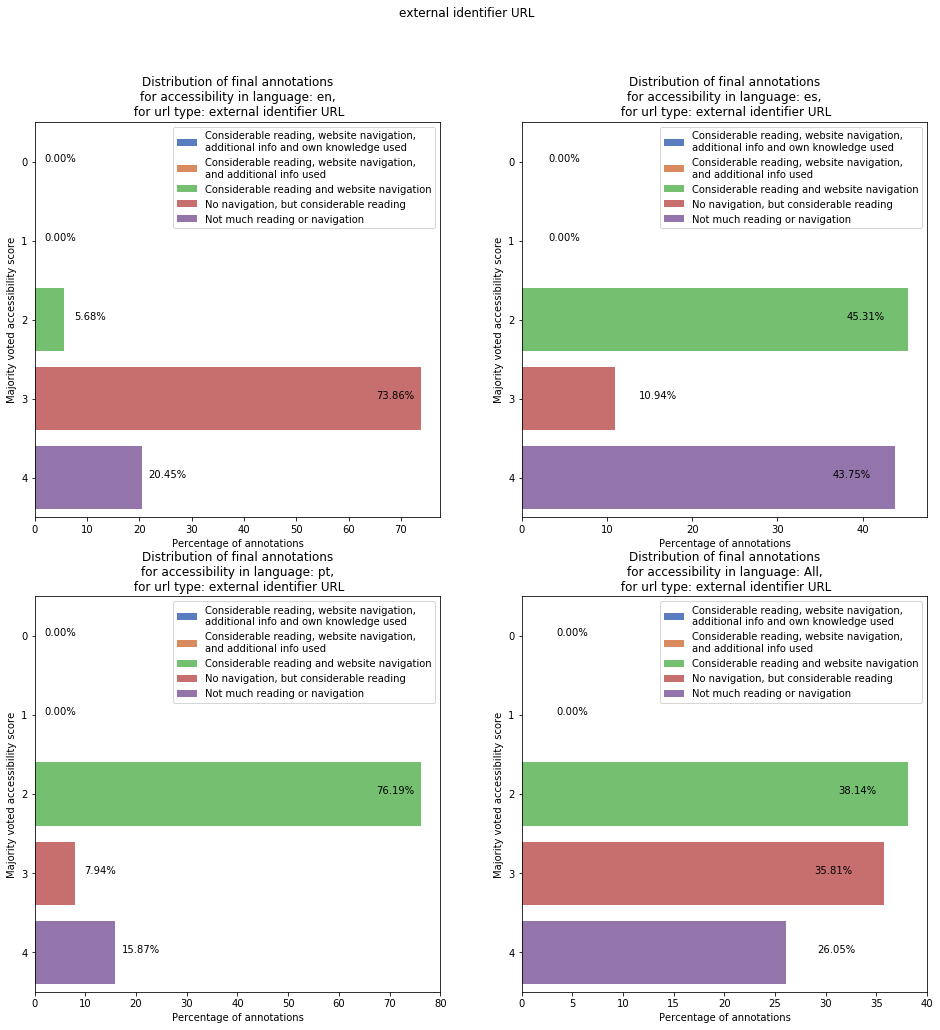

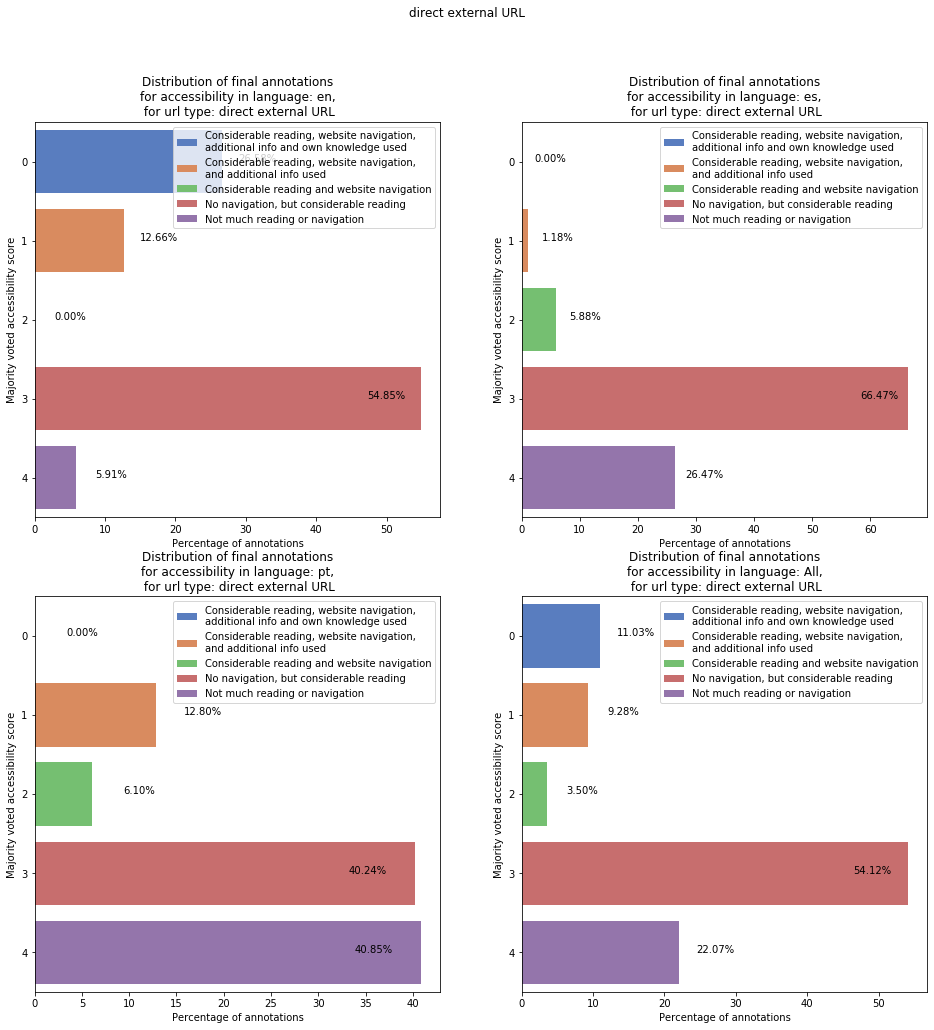

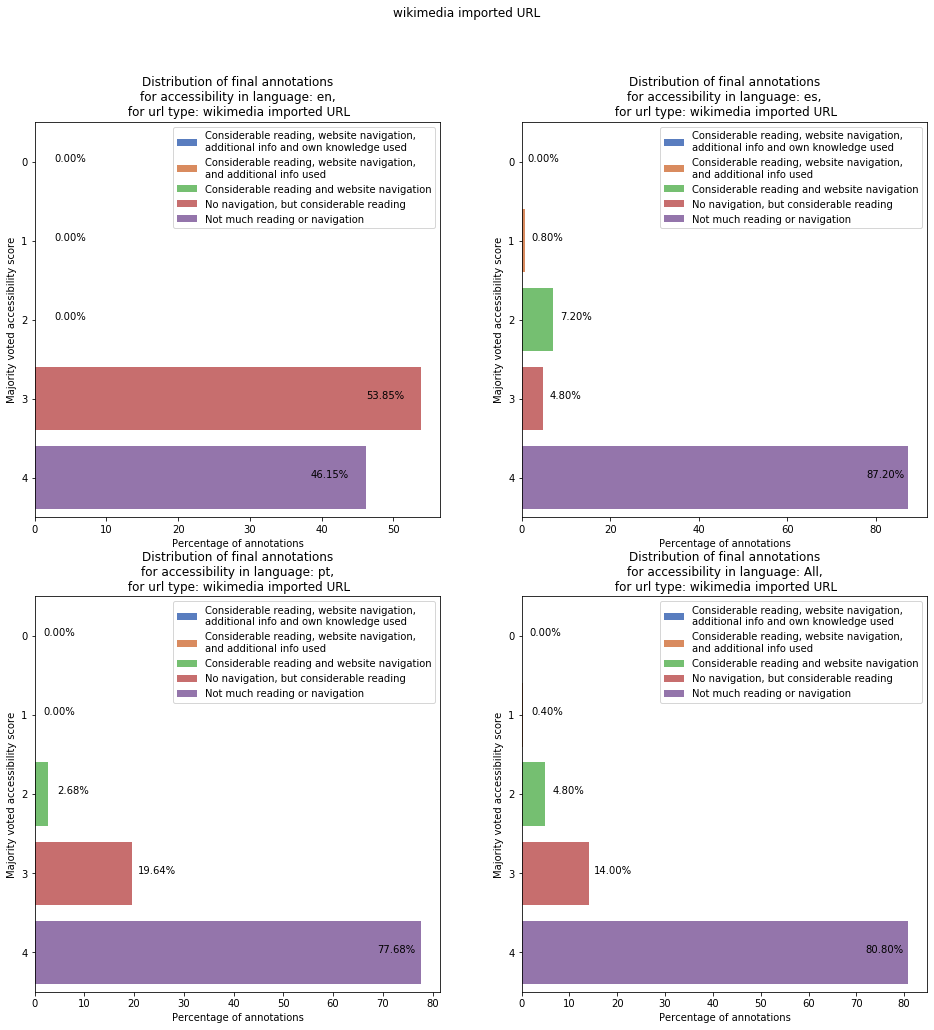

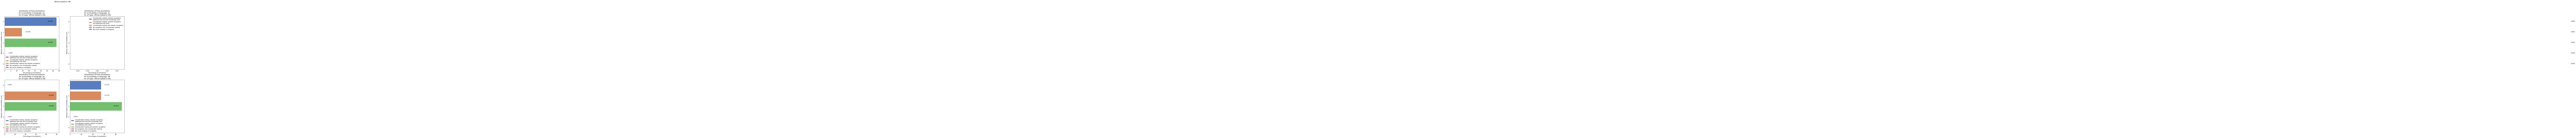

In [78]:
for url_type in url_types:

    sns.set_palette("muted")

    fig, ax = plt.subplots(2,2,figsize=(16,16))
    
    fig.suptitle(url_types[url_type])

    for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
        annotations_df_lan = annotations_df[annotations_df['is_present'] == 1].copy()
        annotations_df_lan = annotations_df_lan[annotations_df_lan['url_type'] == url_type]
        if language != 'All':
            annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]

        annotations_df_lan =\
            annotations_df_lan['difficulty'].value_counts().reset_index()
        annotations_df_lan['per'] =\
            100*annotations_df_lan['difficulty']/sum(annotations_df_lan['difficulty'])

        for j in range(5):
            if j not in annotations_df_lan['index'].values:
                annotations_df_lan = annotations_df_lan.append(
                    {'index':j,'difficulty':0,'per':0}, ignore_index=True
                )

        g = sns.barplot(
            data = annotations_df_lan,
            y = 'index',
            x = 'per', ax = ax[i//2,i%2], orient='h'
        )

        annotate_barplot(g, pad_x = 5, middle = 30, perc=True)
        ax[i//2,i%2].set(
            title='Distribution of final annotations\nfor accessibility in language: {},\n for url type: {}'.format(language, url_types[url_type]),
            xlabel = 'Percentage of annotations',
            ylabel = 'Majority voted accessibility score'
        )
        ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
            'Considerable reading, website navigation,\nadditional info and own knowledge used',
            'Considerable reading, website navigation,\nand additional info used',
            'Considerable reading and website navigation',
            'No navigation, but considerable reading',
            'Not much reading or navigation'
        ])

    plt.show()

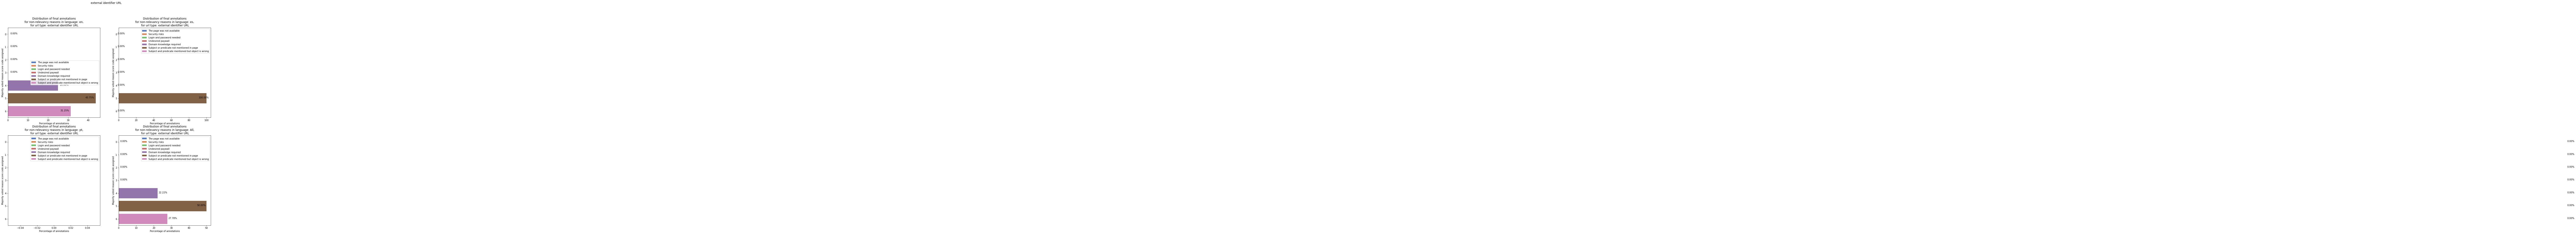

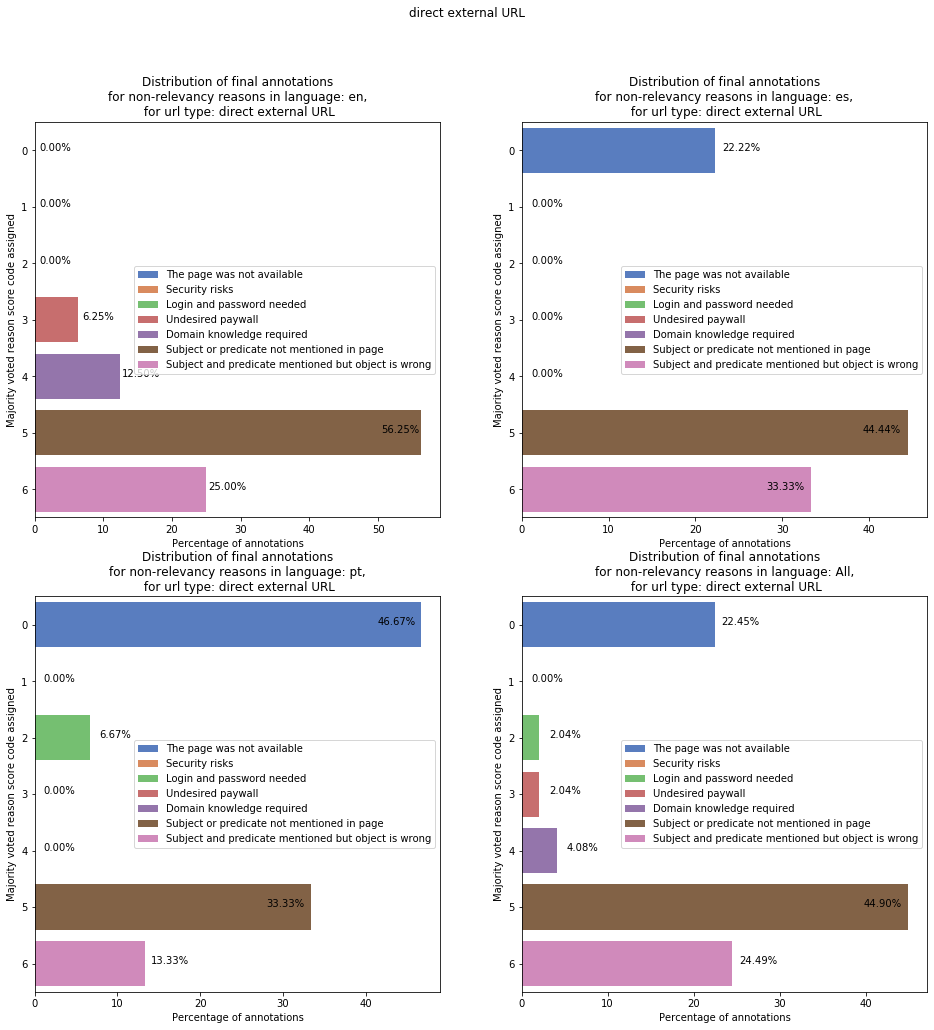

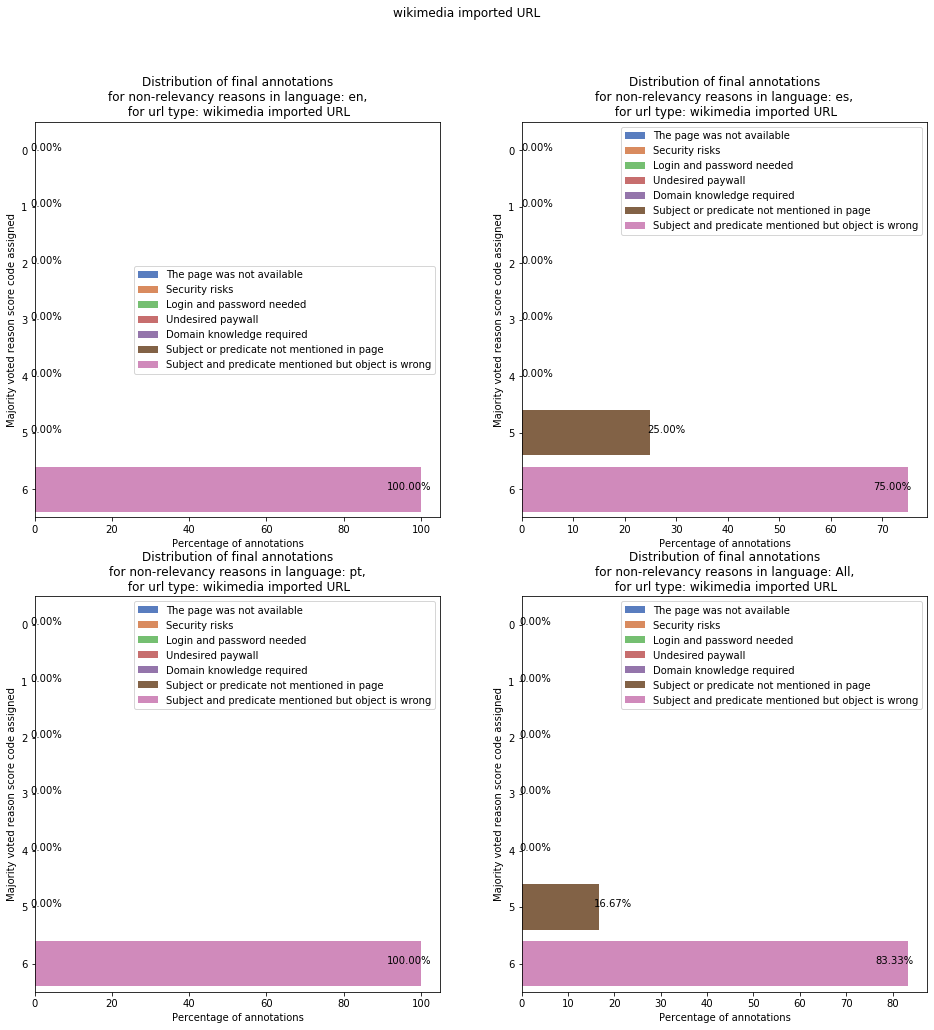

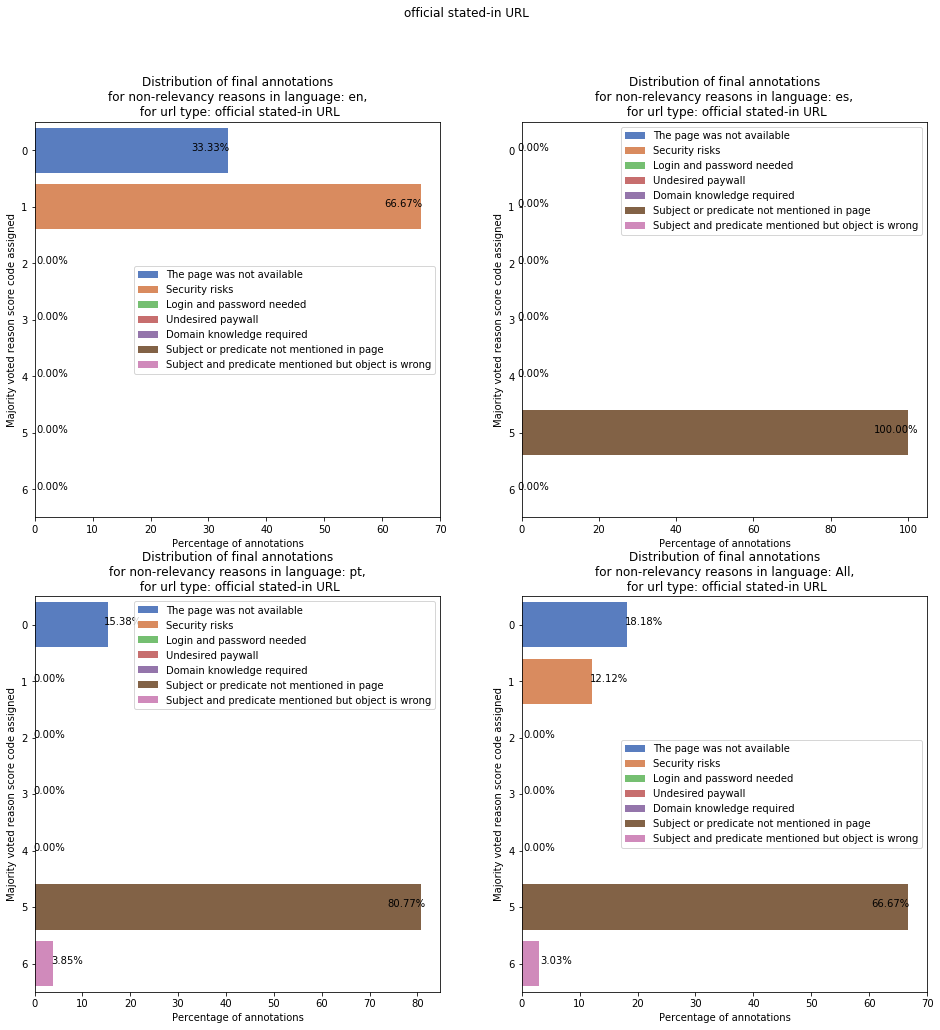

In [79]:
for url_type in url_types:
    
    sns.set_palette("muted")

    fig, ax = plt.subplots(2,2,figsize=(16,16))
    
    fig.suptitle(url_types[url_type])

    for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
        annotations_df_lan = annotations_df[annotations_df['is_present'] == 0].copy()
        annotations_df_lan = annotations_df_lan[annotations_df_lan['url_type'] == url_type]
        if language != 'All':
            annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]

        annotations_df_lan =\
            annotations_df_lan['reason'].value_counts().reset_index()
        annotations_df_lan['per'] =\
            100*annotations_df_lan['reason']/sum(annotations_df_lan['reason'])

        for j in range(7):
            if j not in annotations_df_lan['index'].values:
                annotations_df_lan = annotations_df_lan.append(
                    {'index':j,'reason':0,'per':0}, ignore_index=True
                )

        g = sns.barplot(
            data = annotations_df_lan,
            y = 'index',
            x = 'per', ax = ax[i//2,i%2], orient='h'
        )

        annotate_barplot(g, pad_x = 3, middle = 30, perc=True)    
        ax[i//2,i%2].set(
            title='Distribution of final annotations\nfor non-relevancy reasons in language: {},\n for url type: {}'.format(language, url_types[url_type]),
            xlabel = 'Percentage of annotations',
            ylabel = 'Majority voted reason score code assigned'
        )

        ax[i//2,i%2].legend(
            handles=ax[i//2,i%2].patches,
            labels=[
                'The page was not available',
                'Security risks',
                'Login and password needed',
                'Undesired paywall',
                'Domain knowledge required',
                'Subject or predicate not mentioned in page',
                'Subject and predicate mentioned but object is wrong'
            ],
            loc = 'best' if i != 0 else 'center right'
        )

    plt.show()

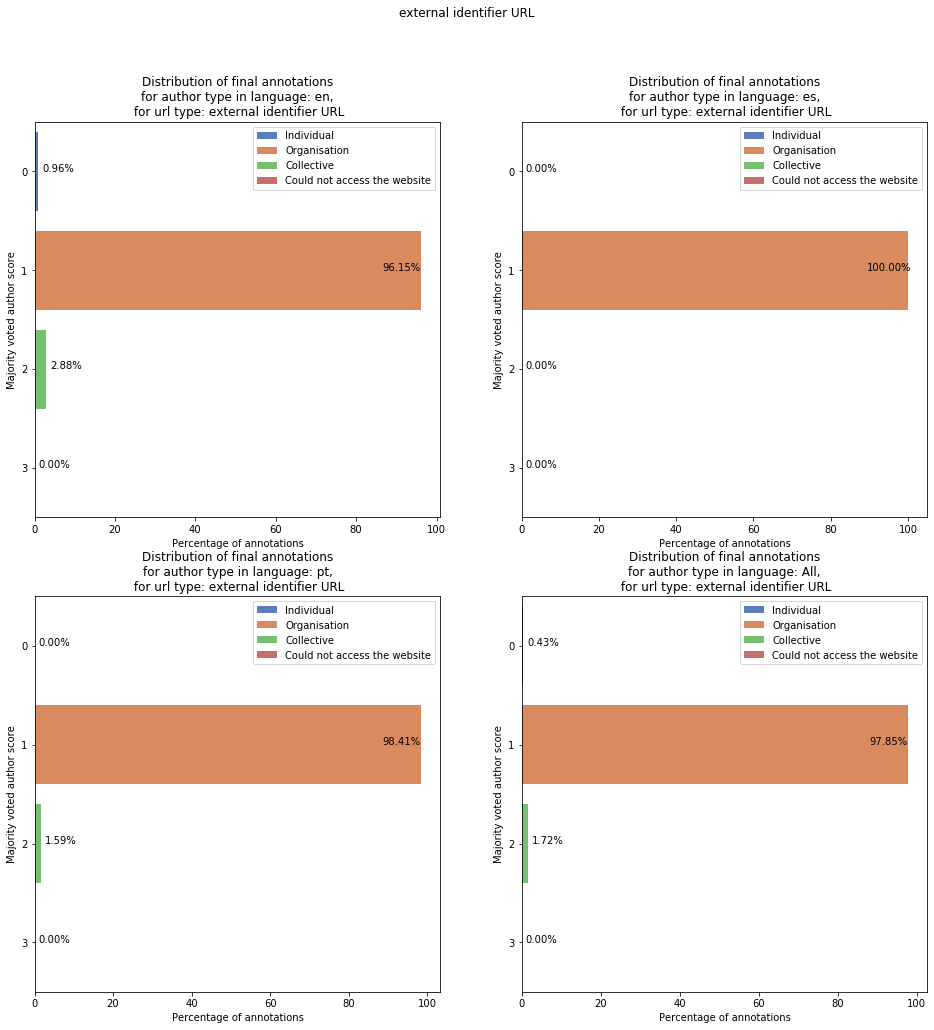

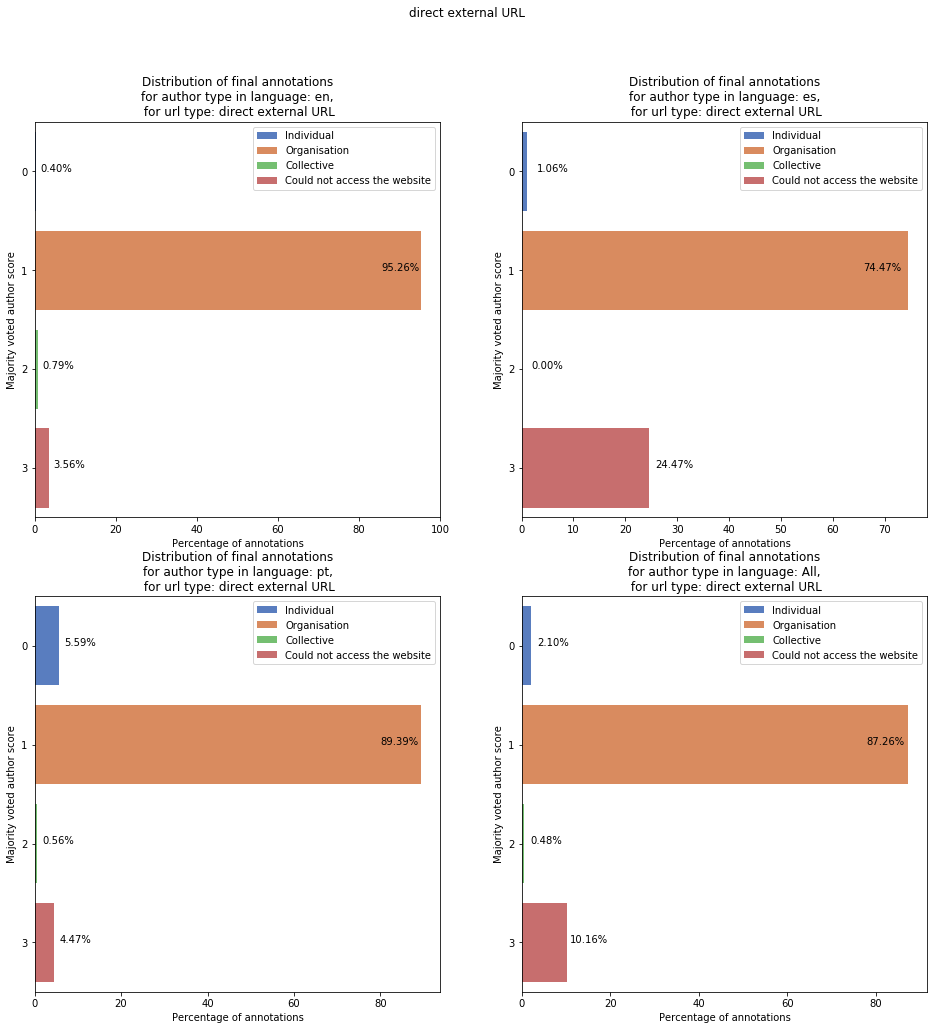

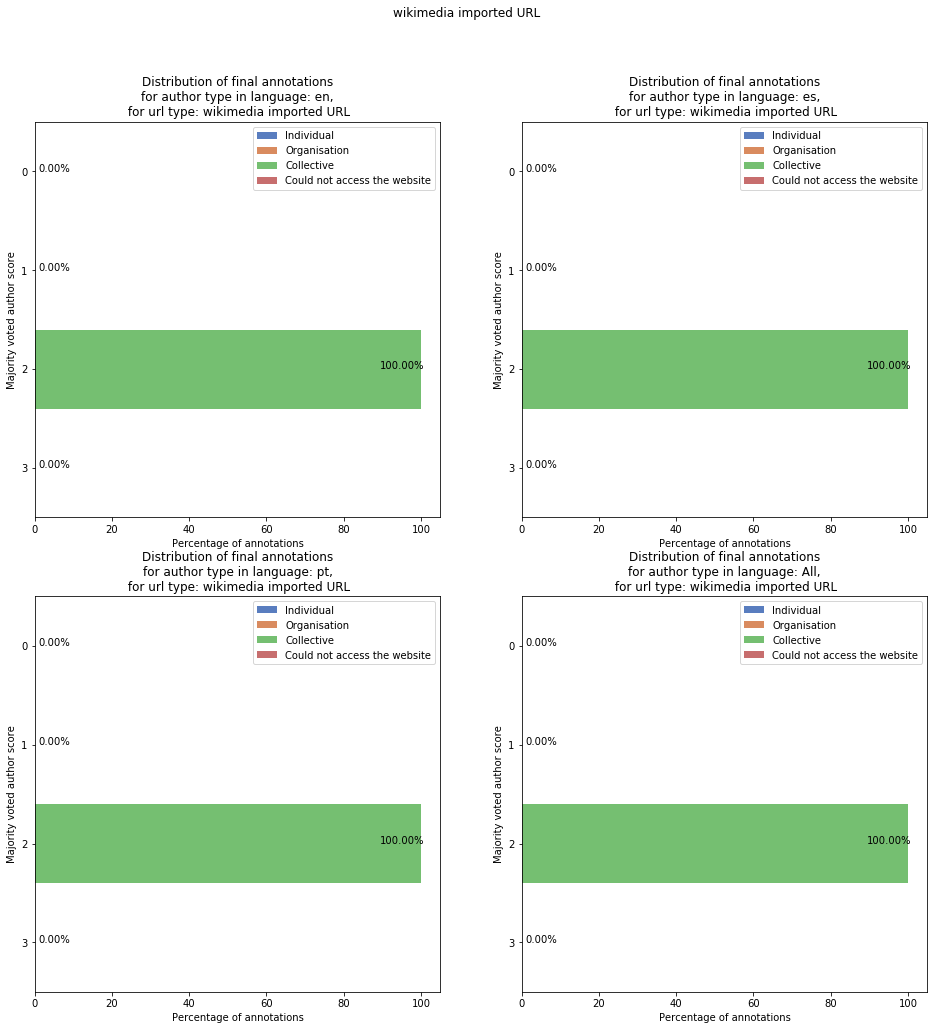

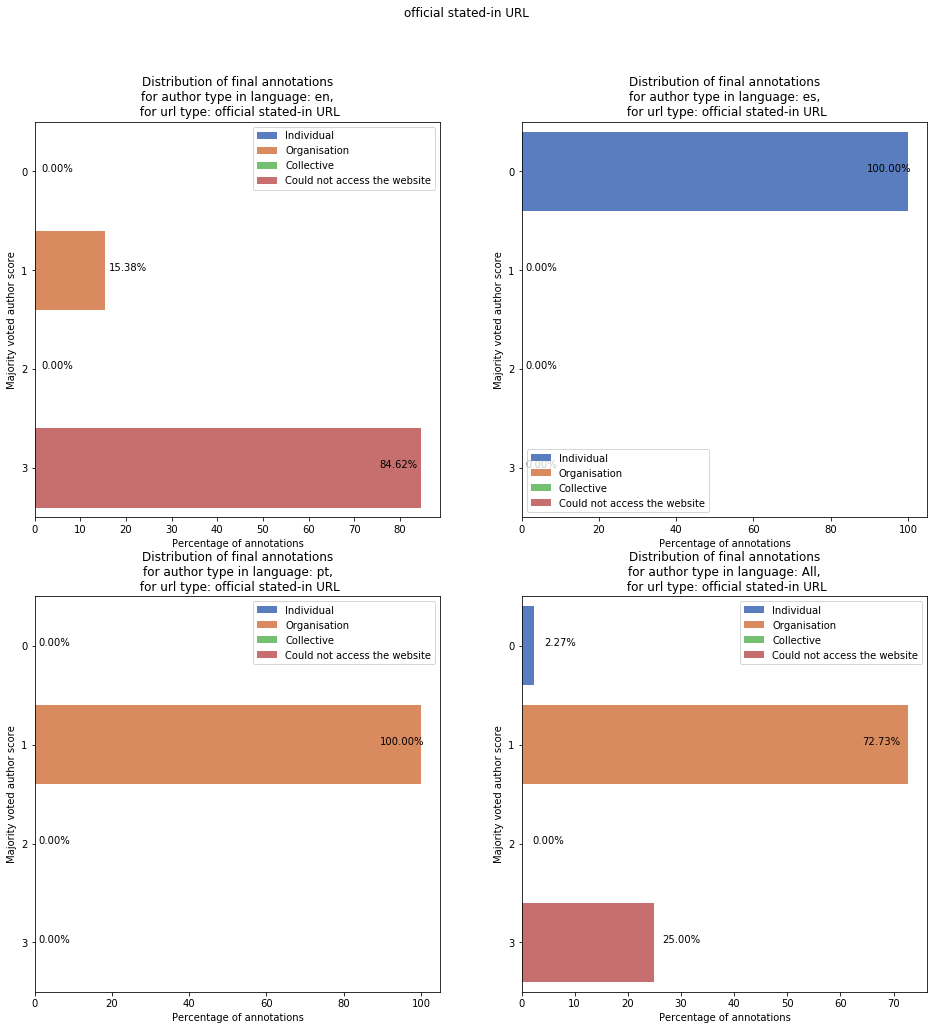

In [80]:
for url_type in url_types:

    sns.set_palette("muted")

    fig, ax = plt.subplots(2,2,figsize=(16,16))
    
    fig.suptitle(url_types[url_type])

    for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
        annotations_df_lan = annotations_df.copy()
        annotations_df_lan = annotations_df_lan[annotations_df_lan['url_type'] == url_type]
        if language != 'All':
            annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]

        annotations_df_lan =\
            annotations_df_lan['author'].value_counts().reset_index()
        annotations_df_lan['per'] =\
            100*annotations_df_lan['author']/sum(annotations_df_lan['author'])

        for j in range(4):
            if j not in annotations_df_lan['index'].values:
                annotations_df_lan = annotations_df_lan.append(
                    {'index':j,'author':0,'per':0}, ignore_index=True
                )

        g = sns.barplot(
            data = annotations_df_lan,
            y = 'index',
            x = 'per', ax = ax[i//2,i%2], orient='h'
        )

        annotate_barplot(g, pad_x = 5, middle = 30, perc=True)
        ax[i//2,i%2].set(
            title='Distribution of final annotations\nfor author type in language: {},\n for url type: {}'.format(language,url_types[url_type]),
            xlabel = 'Percentage of annotations',
            ylabel = 'Majority voted author score'
        )
        ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
            'Individual',
            'Organisation',
            'Collective',
            'Could not access the website'
        ])

    plt.show()

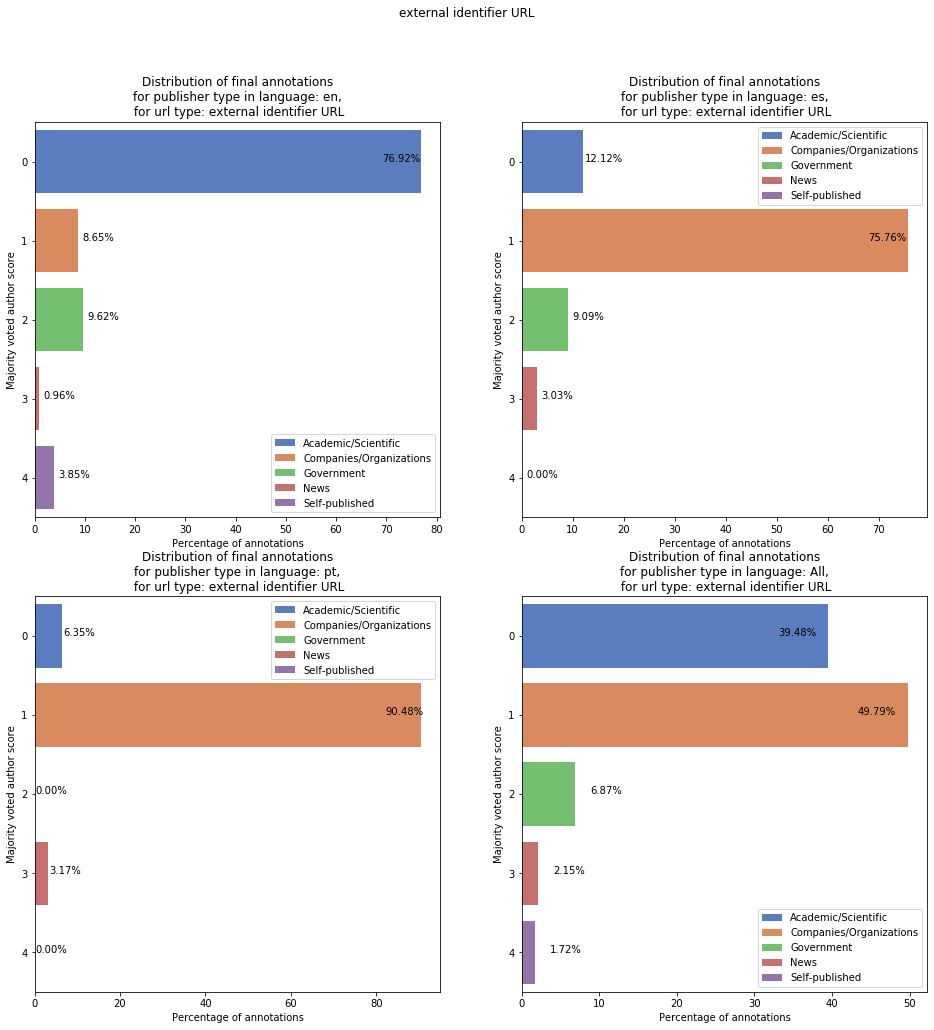

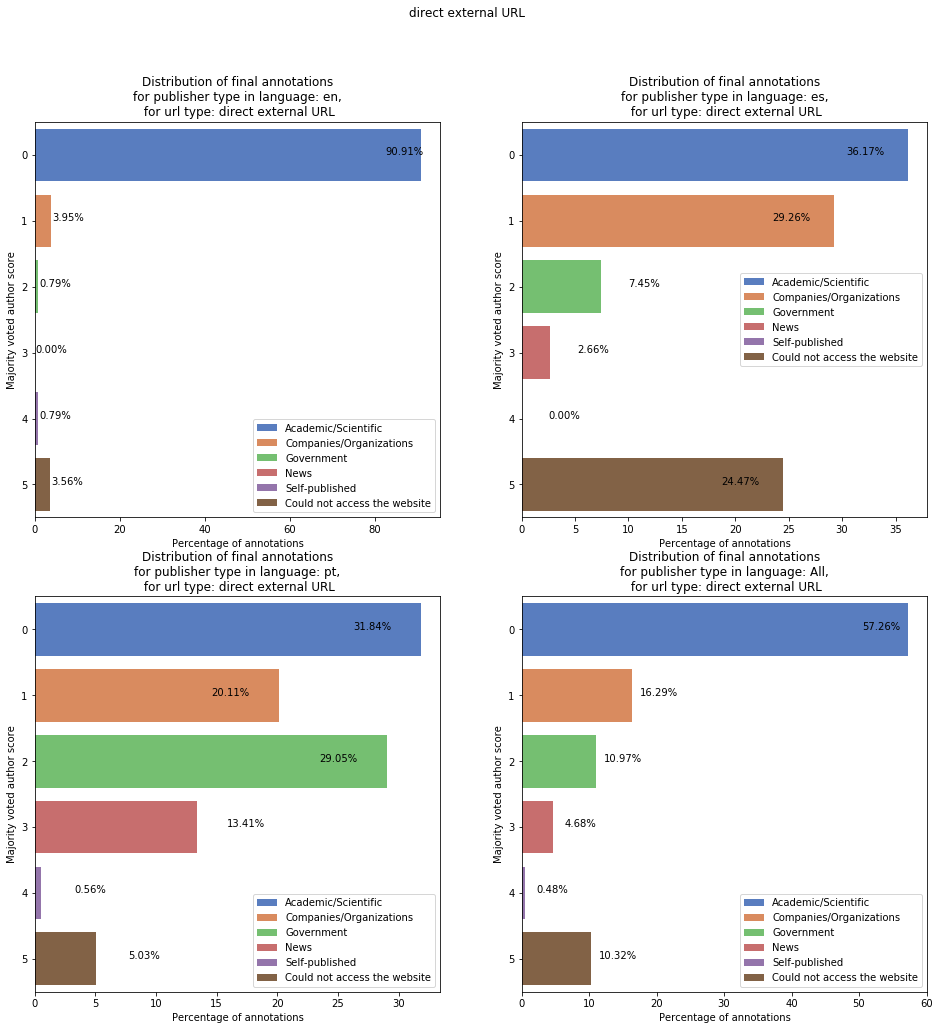

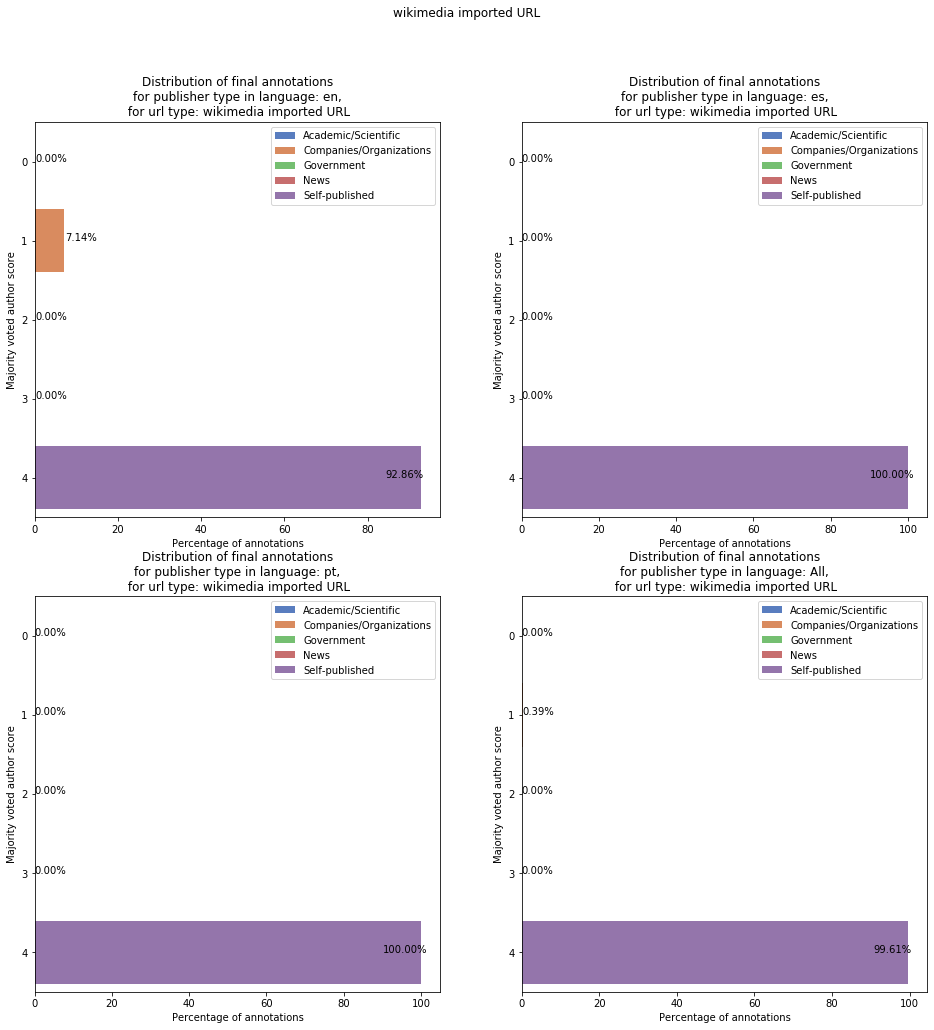

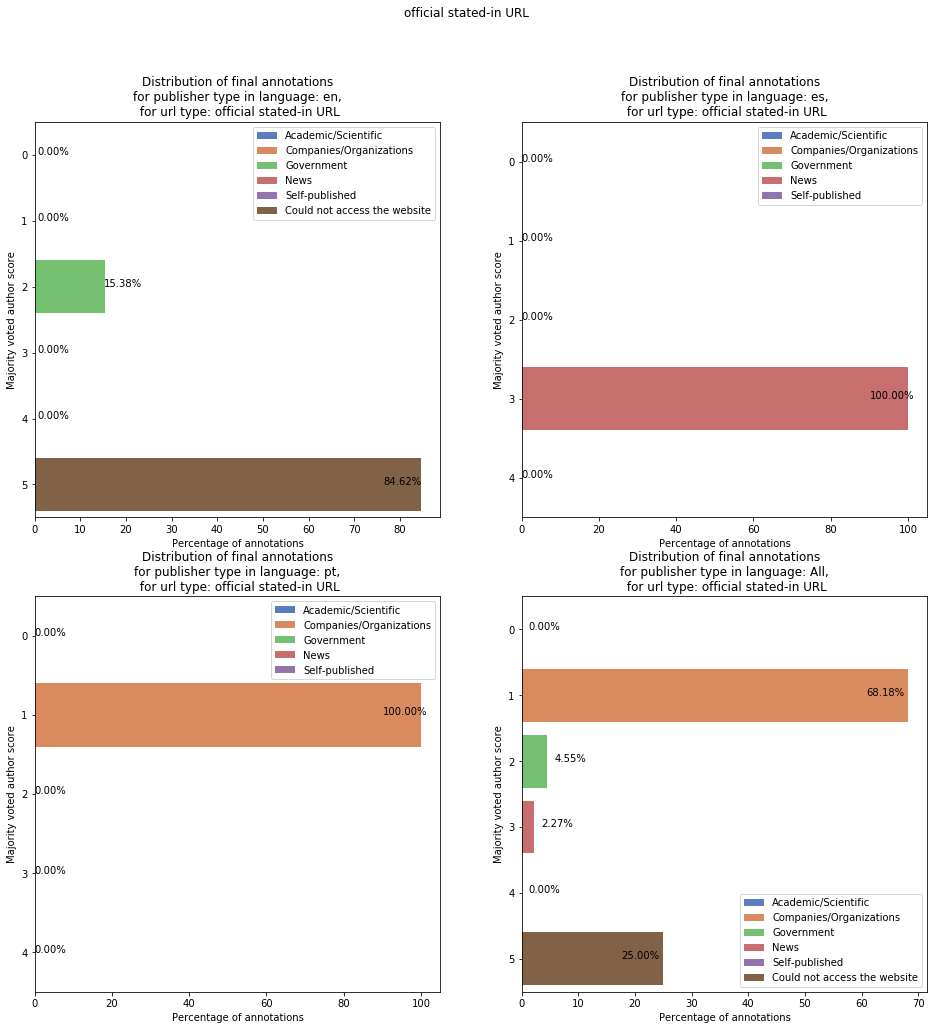

In [81]:
for url_type in url_types:

    sns.set_palette("muted")

    fig, ax = plt.subplots(2,2,figsize=(16,16))

    fig.suptitle(url_types[url_type])

    for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
        annotations_df_lan = annotations_df.copy()
        annotations_df_lan = annotations_df_lan[annotations_df_lan['url_type'] == url_type]
        if language != 'All':
            annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]

        annotations_df_lan =\
            annotations_df_lan['publisher'].value_counts().reset_index()
        annotations_df_lan['per'] =\
            100*annotations_df_lan['publisher']/sum(annotations_df_lan['publisher'])

        for j in range(5):
            if j not in annotations_df_lan['index'].values:
                annotations_df_lan = annotations_df_lan.append(
                    {'index':j,'publisher':0,'per':0}, ignore_index=True
                )

        g = sns.barplot(
            data = annotations_df_lan,
            y = 'index',
            x = 'per', ax = ax[i//2,i%2], orient='h'
        )

        annotate_barplot(g, pad_x = 4, middle = 20, perc=True)
        ax[i//2,i%2].set(
            title='Distribution of final annotations\nfor publisher type in language: {},\n for url type: {}'.format(language, url_types[url_type]),
            xlabel = 'Percentage of annotations',
            ylabel = 'Majority voted author score'
        )
        ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
            'Academic/Scientific',
            'Companies/Organizations',
            'Government',
            'News',
            'Self-published',
            'Could not access the website',
        ])

    plt.show()

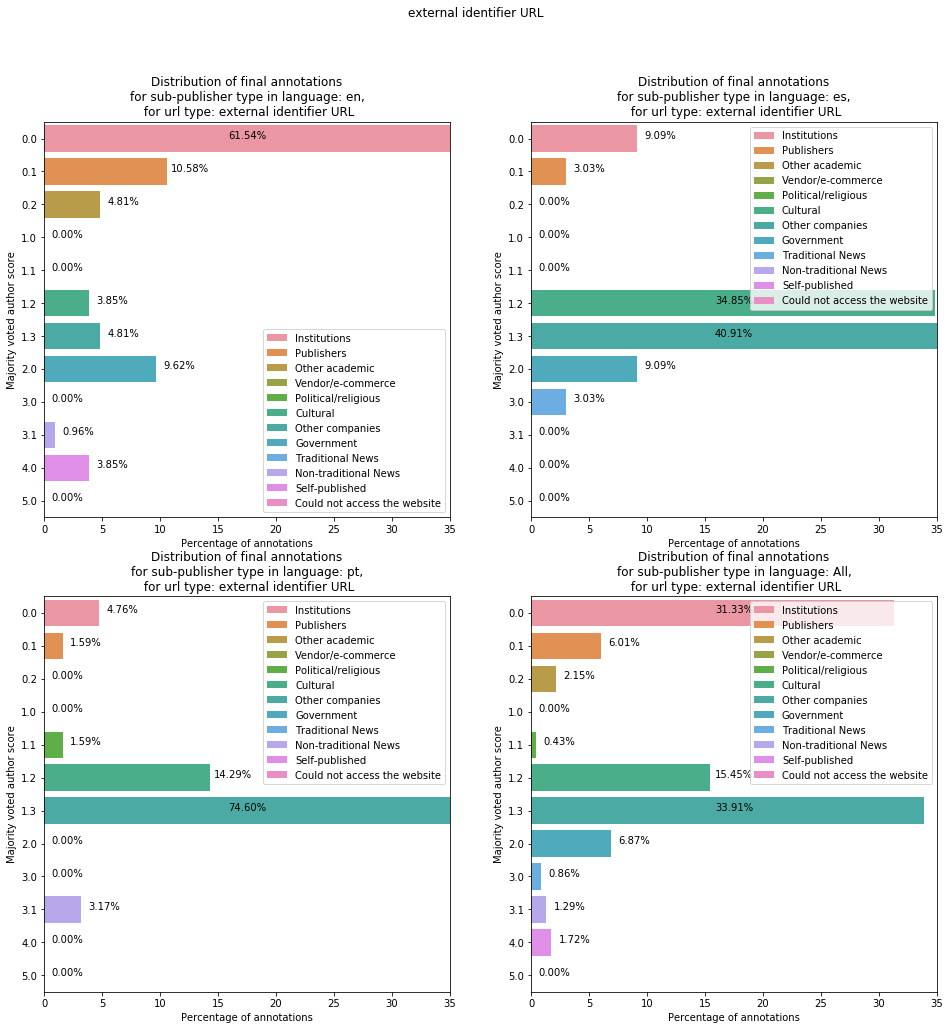

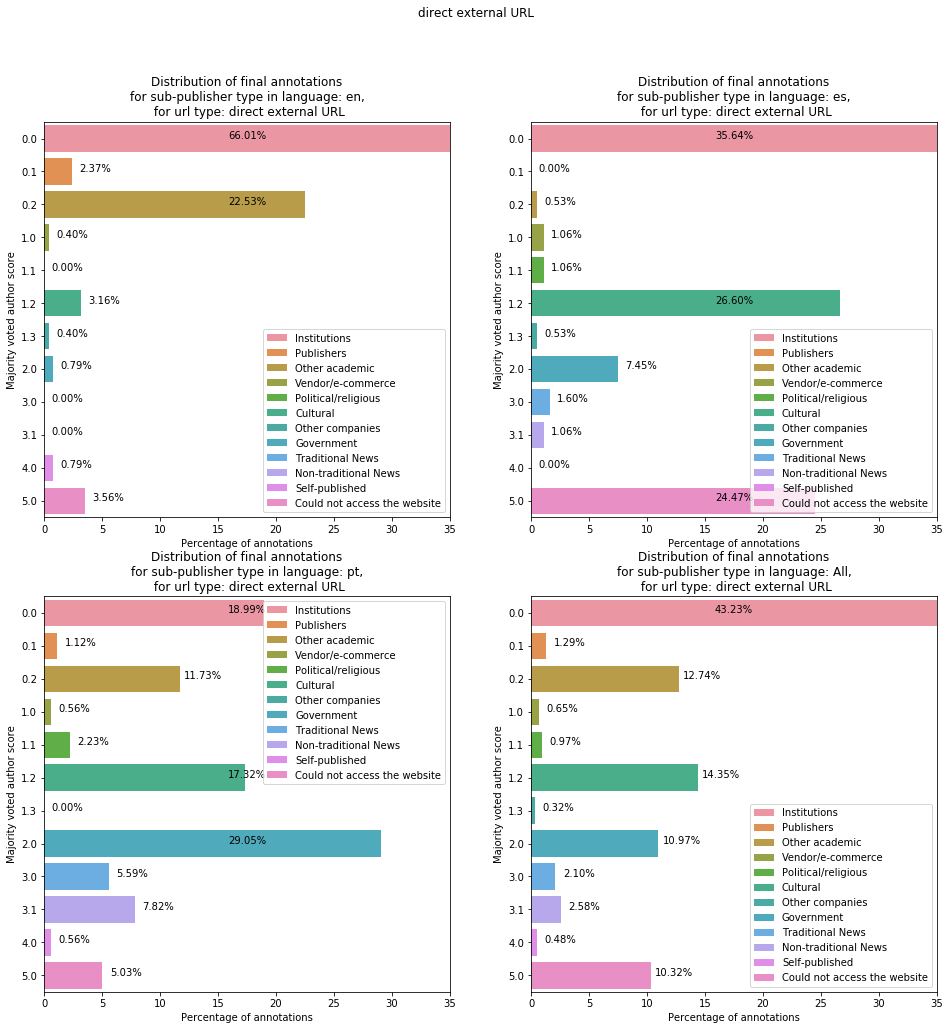

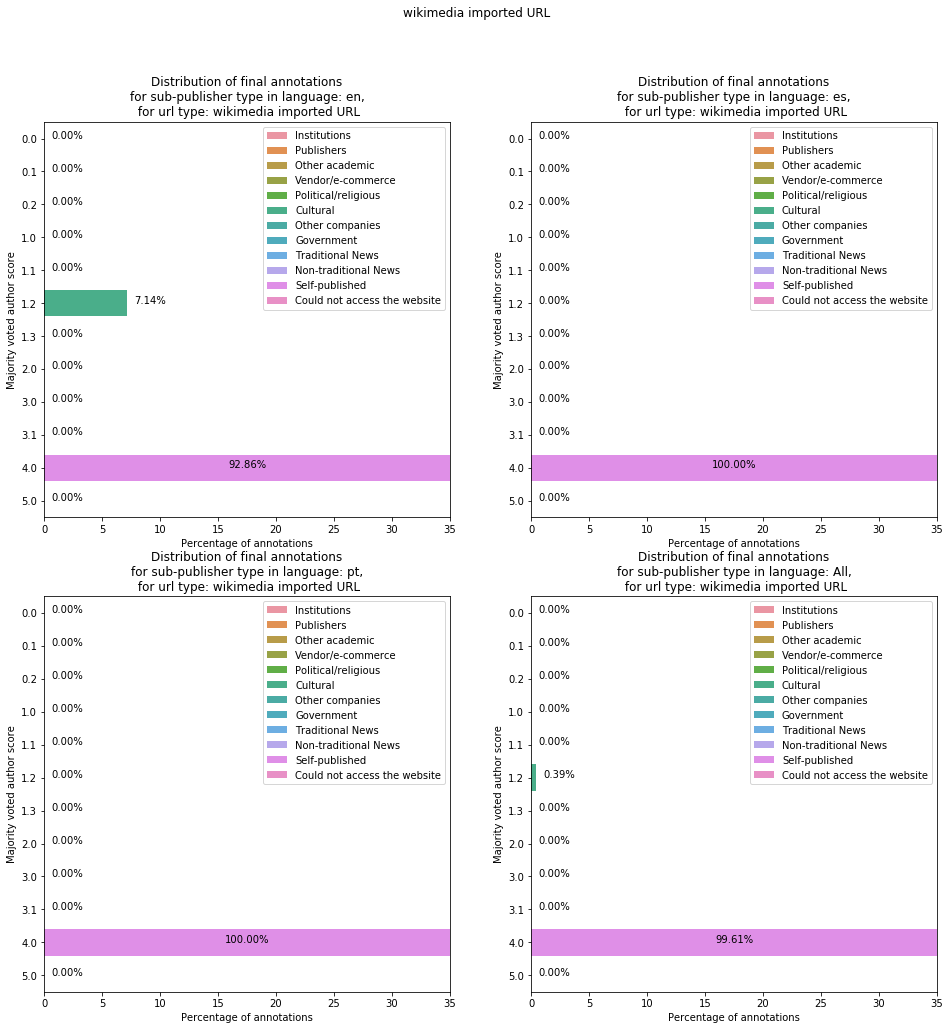

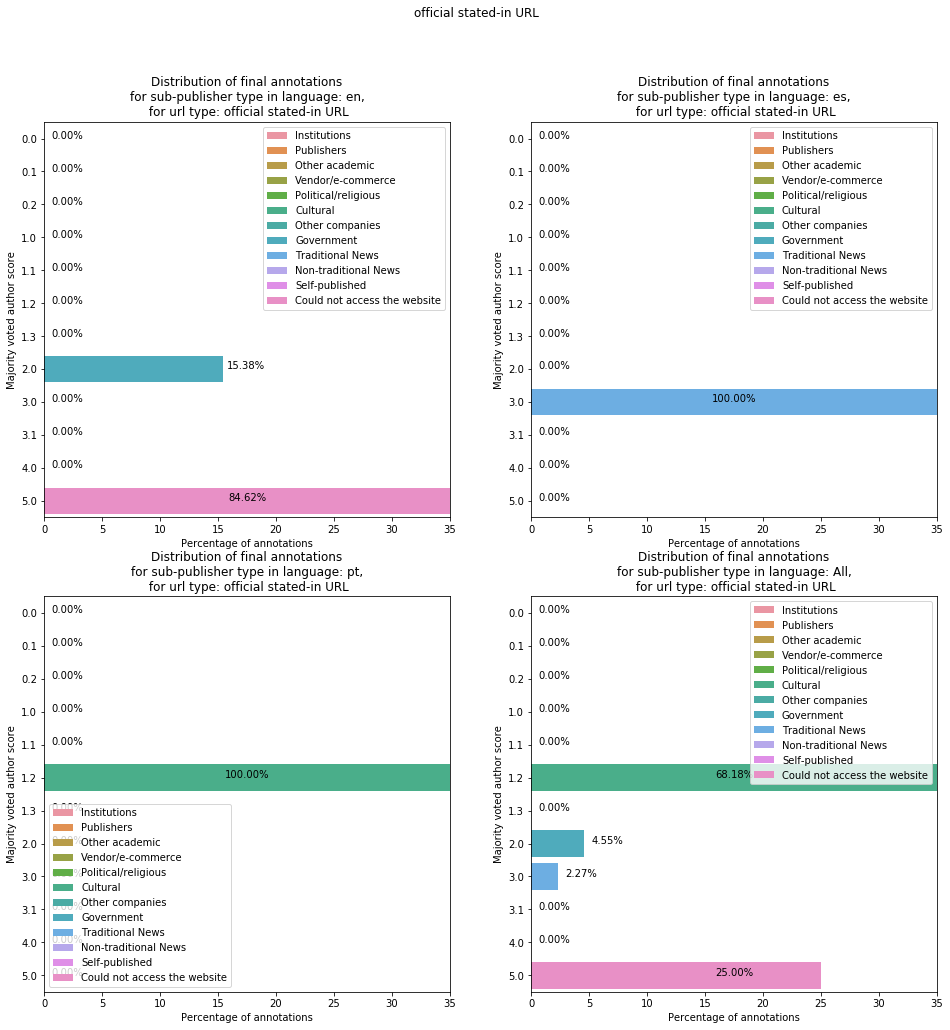

In [82]:
for url_type in url_types:

    sns.set_palette("muted")

    fig, ax = plt.subplots(2,2,figsize=(16,16))

    fig.suptitle(url_types[url_type])

    for i, language in enumerate(list(annotations_df['language_crawl'].unique()) + ['All']):
        annotations_df_lan = annotations_df.copy()
        annotations_df_lan = annotations_df_lan[annotations_df_lan['url_type'] == url_type]
        if language != 'All':
            annotations_df_lan = annotations_df_lan[annotations_df_lan['language_crawl'] == language]

        annotations_df_lan =\
            annotations_df_lan['long_sub_publisher'].value_counts().reset_index()
        annotations_df_lan['per'] =\
            100*annotations_df_lan['long_sub_publisher']/sum(annotations_df_lan['long_sub_publisher'])

        for j in [0.0,0.1,0.2,1.0,1.1,1.2,1.3,2.0,3.0,3.1,4.0,5.0]:
            if j not in annotations_df_lan['index'].values:
                annotations_df_lan = annotations_df_lan.append(
                    {'index':j,'long_sub_publisher':0,'per':0}, ignore_index=True
                )

        g = sns.barplot(
            data = annotations_df_lan,
            y = 'index',
            x = 'per', ax = ax[i//2,i%2], orient='h'
        )

        ax[i//2,i%2].set_xlim([0,35])
        annotate_barplot(g, pad_x = 2, middle = 20, perc=True, limit_to_half=True)
        ax[i//2,i%2].set(
            title='Distribution of final annotations\nfor sub-publisher type in language: {},\n for url type: {}'.format(language, url_types[url_type]),
            xlabel = 'Percentage of annotations',
            ylabel = 'Majority voted author score'
        )

        ax[i//2,i%2].legend(handles=ax[i//2,i%2].patches,labels=[
            'Institutions',
            'Publishers',
            'Other academic',
            'Vendor/e-commerce',
            'Political/religious',
            'Cultural',
            'Other companies',
            'Government',
            'Traditional News',
            'Non-traditional News',
            'Self-published',
            'Could not access the website',
        ])

    plt.show()